<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Regression and Classification with the Ames Housing Data

---

You have just joined a new "full stack" real estate company in Ames, Iowa. The strategy of the firm is two-fold:
- Own the entire process from the purchase of the land all the way to sale of the house, and anything in between.
- Use statistical analysis to optimize investment and maximize return.

The company is still small, and though investment is substantial the short-term goals of the company are more oriented towards purchasing existing houses and flipping them as opposed to constructing entirely new houses. That being said, the company has access to a large construction workforce operating at rock-bottom prices.

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Estimating the value of homes from fixed characteristics.

---

Your superiors have outlined this year's strategy for the company:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.
3. Evaluate the mean dollar value of different renovations.

Then we can use that to buy houses that are likely to sell for more than the cost of the purchase plus renovations.

Your first job is to tackle #1. You have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt
    
You need to build a reliable estimator for the price of the house given characteristics of the house that cannot be renovated. Some examples include:
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

and many more. 

Some examples of things that **ARE renovate-able:**
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components

and generally anything you deem can be modified without having to undergo major construction on the house.

---

**Your goals:**
1. Perform any cleaning, feature engineering, and EDA you deem necessary.
- Be sure to remove any houses that are not residential from the dataset.
- Identify **fixed** features that can predict price.
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Characterize your model. How well does it perform? What are the best estimates of price?

> **Note:** The EDA and feature engineering component to this project is not trivial! Be sure to always think critically and creatively. Justify your actions! Use the data description file!

In [2]:
# Load the data
house = pd.read_csv('./housing.csv')

In [3]:
# Examine the dataframe
house.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
# Examine the dataframe
house.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[5 rows x 81 columns]

In [5]:
# Examine the shape of dataframe
house.shape 

(1460, 81)

In [6]:
# Examine info of dataframe
house.info()

# Variables that are supposed to have float or int values, do have float or int dtypes

# Variable columns that needs checking and cleaning
    # Alley - Has many null values 
    # MasVnrType and MasVnrType - Has null values
    # BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 - Has null values
    # Electrical - Has null values
    # FireplaceQu - Has null values
    # GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond  - Has null values
    # PoolQC - Has null values
    # Fence - Has null values
    # MiscFeature - Has null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

<font color='green'>
    
### Observation: 

</font>

After checking the original dataset, I realize that many columns marked out as having null values have values that are supposed to be 'NA'. The pd.read_csv() function reads NA values as Nan, hence resulting in null values in those columns.

Columns with the issue of NA converted to null values
    # Alley
    # BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2
    # FireplaceQu
    # GarageType, GarageFinish, GarageQual, GarageCond
    # PoolQC
    # Fence
    # MiscFeature
    
Columns with null values but not due to NA
    # MasVnrType and MasVnrArea
    # Electrical
    # GarageYrBlt
    # LotFrontage
    
Since most of the columns with null values to clean have the issue of pandas function reading NA as null value, I will use the na_filter when reading csv instead to avoid the problem. 
I will then manually clean the values for other columns eg. manually clean the variable 'Electrical' after that.

In [7]:
# Read csv with na_filter = True

house_NA = pd.read_csv('./housing.csv',na_filter = False)

In [8]:
# Work on MasVnrType column
# Replace NA with np.nan

house_NA['MasVnrType'] = house_NA['MasVnrType'].replace('NA',np.nan)

In [9]:
# Work on MasVnrArea column
# Replace NA with np.nan

house_NA['MasVnrArea'] = house_NA['MasVnrArea'].replace('NA',np.nan)

converted_int = []

for value in house_NA['MasVnrArea'].values:
    try:
        value = int(value)
        converted_int.append(value)
    except ValueError:
        converted_int.append(value)

house_NA['MasVnrArea'] = converted_int

In [10]:
# Work on Electrical column
# Replace NA with np.nan

house_NA['Electrical'] = house_NA['Electrical'].replace('NA',np.nan)

In [11]:
# Work on GarageYrBlt column
# Replace NA with np.nan

house_NA['GarageYrBlt'] = house_NA['GarageYrBlt'].replace('NA',np.nan)

# Convert the values in GarageYrBlt to integers

converted_int = []

for value in house_NA['GarageYrBlt'].values:
    try:
        value = int(value)
        converted_int.append(value)
    except ValueError:
        converted_int.append(value)
        
house_NA['GarageYrBlt'] = converted_int

In [12]:
# Work on LotFrontage column
# Replace NA with np.nan

house_NA['LotFrontage'] = house_NA['LotFrontage'].replace('NA',np.nan)

# Convert the values in LotFrontage to integers

converted_int = []

for value in house_NA['LotFrontage'].values:
    try:
        value = int(value)
        converted_int.append(value)
    except ValueError:
        converted_int.append(value)
        
house_NA['LotFrontage'] = converted_int

In [13]:
# Remove non-residential properties from the dataframe as we are not interested to study them in this case

house_NA_resi = house_NA[house_NA['MSZoning'].isin(['RH','RL','RP','RM'])]

In [14]:
## Check for reasonableness of values in the columns

# for columns in house_NA.columns:
    # print(columns, house_NA[columns].unique())

<font color='purple'> 

## Classify the variables into Fixed characteristics vs Renovate-able characteristics

</font>

__Fixed characteristics__
    # 'MSSubClass', 'MSZoning'
    # 'LotFrontage', 'LotArea', 'Street','Alley', 'LotShape', 'LandContour','LotConfig', 'LandSlope'
    # 'Neighborhood','Condition1','Condition2'
    # 'BldgType','YearBuilt'
    # 'Foundation'
    # '1stFlrSF', '2ndFlrSF', 'TotalBsmtSF'
    # 'GarageCars', 'GarageArea','GarageType','GarageYrBlt'
    # 'TotRmsAbvGrd', 'BedroomAbvGr', 'KitchenAbvGr','GrLivArea'
    # 'BsmtFullBath', 'BsmtHalfBath', 'FullBath','HalfBath'
    # 'MoSold', 'YrSold', 'SaleType',
    # 'SaleCondition', 'SalePrice'

__Renovate-able characateristics__
    # 'HouseStyle'
    # 'OverallQual', 'OverallCond'
    # 'YearRemodAdd',
    # 'RoofStyle', 'RoofMatl', 'Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','ExterQual', 'ExterCond'
    # 'BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1','BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF' 
    # 'Heating','HeatingQC', 'CentralAir'
    # 'Electrical', 'Utilities'
    # 'LowQualFinSF', 'Functional'
    # 'KitchenQual'
    # 'Fireplaces','FireplaceQu'
    # 'GarageFinish', 'GarageQual','GarageCond'
    # 'PavedDrive', 'Fence'
    # 'WoodDeckSF', 'OpenPorchSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch'
    # 'PoolArea', 'PoolQC',
    # 'MiscFeature', 'MiscVal'

<font color='purple'> 

### For this question, we are interested in the fixed characteristics and will study the fixed characteristics for residential properties first.

</font>

In [15]:
# Remove outliers target and predictor variables to prevent skewed data for making predictions
    # Variables with a small range e.g. FullBath are excluded as I have checked in the previous steps 
    # to ensure that the values are within a reasonable range.
    # Outliers are defined as values more than 3x standard deviation from the mean in this case.
    # This is to prevent eliminating too many values

index_list = []    
    
for variable in ['SalePrice','LotFrontage','GarageYrBlt','1stFlrSF', '2ndFlrSF', 'TotalBsmtSF',
              'GarageArea','LotArea','YearBuilt']:
    index_to_drop = house_NA_resi[(house_NA_resi[variable] > (house_NA_resi[variable].mean()+ 
                                                              3*house_NA_resi[variable].std()))|
                    (house_NA_resi[variable] < (house_NA_resi[variable].mean()- 
                                                3*house_NA_resi[variable].std()))].index
    for index in index_to_drop:
        if index not in index_list:
            index_list.append(index)
            
house_NA_resi = house_NA_resi.drop(index_list, axis=0)

<font color='purple'>

## For the first part of the EDA, I will start off with studying the continuous variables first.

</font>

In [16]:
# Find the summary statistics of the variables 

house_NA_resi.describe()
    # Only shows summary stats of the continuous variables

Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1327.000000  1327.000000  1087.000000   1327.000000  1327.000000   
mean    732.793519    55.602864    68.904324   9749.128862     5.987189   
std     424.288873    41.144704    20.114453   4043.612987     1.299374   
min       1.000000    20.000000    21.000000   1300.000000     1.000000   
25%     363.500000    20.000000    59.000000   7590.000000     5.000000   
50%     735.000000    50.000000    69.000000   9473.000000     6.000000   
75%    1100.500000    70.000000    80.000000  11424.000000     7.000000   
max    1460.000000   190.000000   141.000000  39104.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1327.000000  1327.000000   1327.000000  1324.000000  1327.000000  ...   
mean      5.616428  1969.865863   1983.599096    94.679758   427.090430  ...   
std       1.124847    29.127251     20.586292   156.016420   412.899044  ...   
min       1.000000  1882.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1953.000000   1965.000000     0.000000     0.000000  ...   
50%       5.000000  1971.000000   1991.000000     0.000000   378.000000  ...   
75%       6.000000  1998.000000   2003.000000   160.000000   697.000000  ...   
max       9.000000  2010.000000   2010.000000  1115.000000  1880.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1327.000000  1327.000000    1327.000000  1327.000000  1327.000000   
mean     92.978900    41.938960      21.738508     3.751319    15.474755   
std     122.049138    61.317376      59.142772    30.731626    56.224052   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    20.000000       0.000000     0.000000     0.000000   
75%     168.000000    63.000000       0.000000     0.000000     0.000000   
max     736.000000   547.000000     330.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1327.000000   1327.000000  1327.000000  1327.000000    1327.000000  
mean      1.869631     46.480784     6.317257  2007.813866  172893.110776  
std      34.311219    519.566812     2.692013     1.328146   65548.742178  
min       0.000000      0.000000     1.000000  2006.000000   37900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  128500.000000  
50%       0.000000      0.000000     6.000000  2008.000000  158000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  203500.000000  
max     738.000000  15500.000000    12.000000  2010.000000  415298.000000  

[8 rows x 38 columns]

In [17]:
# Study if there is any linear correlation between the fixed characteristics and price

house_corr = house_NA_resi[['LotFrontage','GarageYrBlt','1stFlrSF', '2ndFlrSF', 'TotalBsmtSF',
                                       'GarageArea','LotArea','GarageCars','TotRmsAbvGrd', 'BedroomAbvGr', 
                                       'KitchenAbvGr','GrLivArea','BsmtFullBath', 'BsmtHalfBath', 'YearBuilt',
                                       'FullBath','HalfBath','MoSold', 'YrSold','SalePrice']].corr()

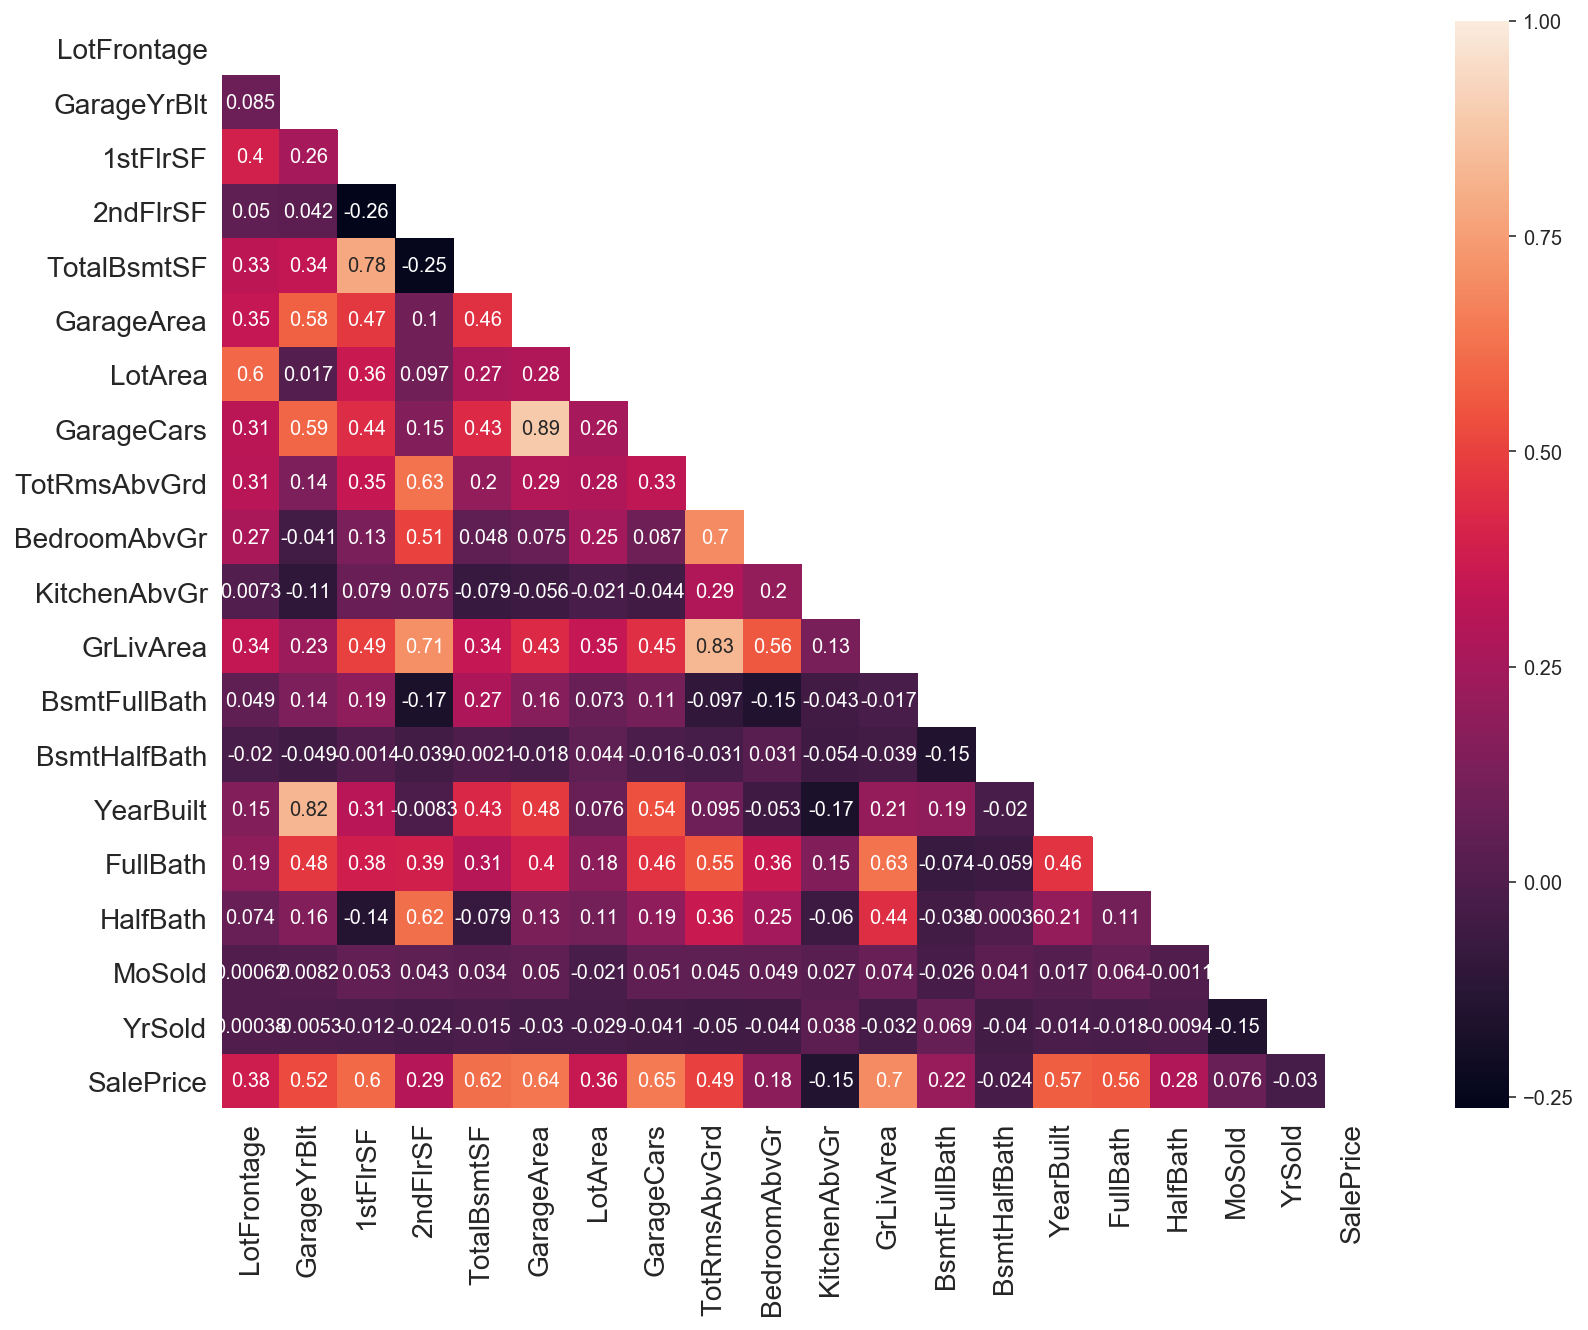

In [18]:
# Plot a heatmap of the linear correlation between the continuous characteristics and price

# Set the default matplotlib figure size to 7x7.
fix, ax = plt.subplots(figsize=(13,10))

# Generate a mask for the upper triangle (taken from Seaborn's example gallery).
mask = np.zeros_like(house_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with Seaborn.
# Assign the matplotlib axis the function returns. This will allow us to resize the labels.
ax = sns.heatmap(house_corr, mask=mask, ax=ax, annot=True)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

plt.show()

<font color='green'>

### Observation

</font>

Most of the characteristics have a positive correlation with the Sale Price. 

Variables with coefficient greater than 0.5:
    # 1stFlrSF
    # TotalBsmtSF
    # GarageArea
    # GarageCars
    # TotRmsAbvGrd
    # GrLivArea
    # YearBuilt
    # FullBath
    
Based on the study of the correlation coefficients, tentatively shortlist the variables greater than 0.5 as important characteristics for predicting Sale Price. I will focus the EDA on studying these shortlisted features, and other features found to be important through online research. 

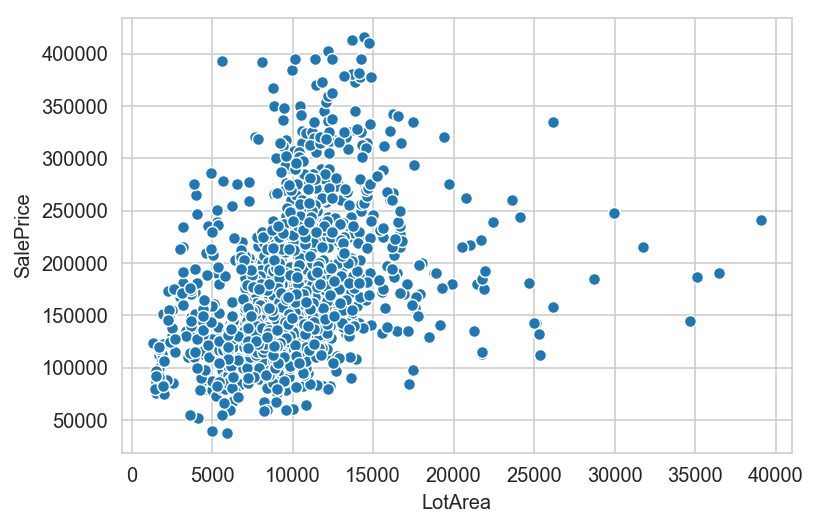

In [19]:
# Based on online research, price per sqf is a common metric for determining Sale Price
# While some sqf variables do not show a strong correlation to the Sale Price, 
# it would be worthwhile studying those variables

# Study Fixed Characteristics - 'LotArea'
    # Lot area should theoretically be an important determinant of pricing since buyers should be willing 
    # to pay more for a larger lot. 

sns.scatterplot(x = house_NA_resi['LotArea'], y = house_NA_resi['SalePrice'])

<font color='green'>

### Observation:

</font>

A larger lot area does not necessary translate to a higher price. This is also confirmed by the correlation coefficient. This could be because the lot area does not necessarily correspond to the built-up SF, which is also an important determinant of pricing. 

In [20]:
# Find the total built-up SF of the properties by using '1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', 'GarageArea'

house_NA_resi['Total_SF'] = house_NA_resi['1stFlrSF'] + house_NA_resi['2ndFlrSF'] + \
                            house_NA_resi['TotalBsmtSF'] + house_NA_resi['GarageArea']

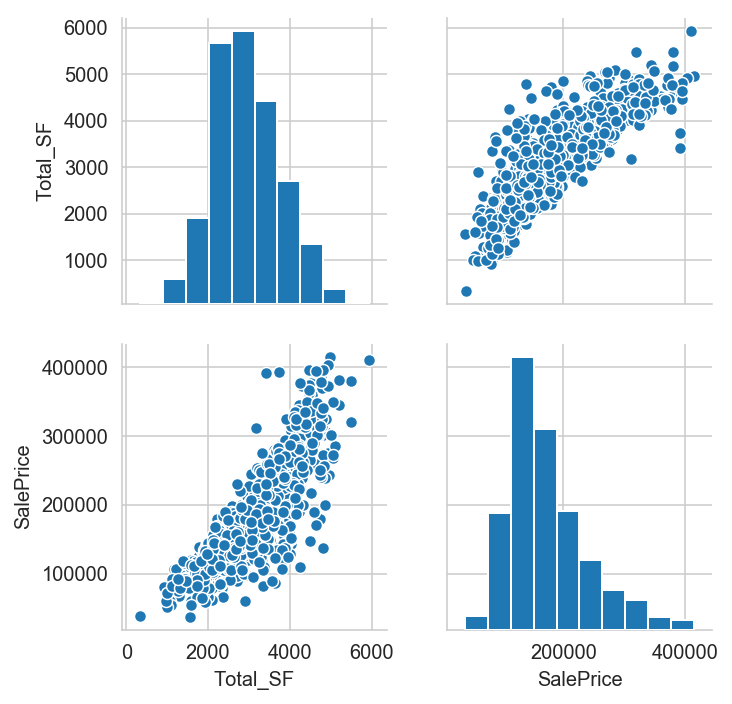

In [21]:
# Plot built-up SF with Sale Price

sns.pairplot(house_NA_resi[['Total_SF','SalePrice']])

In [22]:
# Find correlation coefficient between Sale Price and Built-up SF

house_NA_resi[['Total_SF','SalePrice']].corr()

Total_SF  SalePrice
Total_SF   1.000000   0.841144
SalePrice  0.841144   1.000000

<font color='green'>

### Observation: 

</font>

From the plot, there is a strong linear correlation between Sale Price and Total_SF. This is confirmed by the higher correlation coefficient calculated. __Total_SF__ should be an important variable for predicting Sale Price.

As the correlation coefficient of Total_SF is higher than the individual variables for SF e.g. 1stFlrSF, we should disregard those variables and concentrate on using this as a predictor variable instead to avoid multi-colinearity.

In [23]:
# Study Fixed Characteristics - 'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'

fig, ((ax1,ax2), (ax3, ax4)) = plt.subplots(ncols=2,nrows=2,figsize=(14, 7))

sns.scatterplot(house_NA_resi['BsmtFullBath'], house_NA_resi['SalePrice'], ax=ax1, color='r',alpha=0.5)
sns.scatterplot(house_NA_resi['BsmtHalfBath'], house_NA_resi['SalePrice'], ax=ax2, color='b',alpha=0.5)
sns.scatterplot(house_NA_resi['FullBath'], house_NA_resi['SalePrice'], ax=ax3, color='pink',alpha=0.5)
sns.scatterplot(house_NA_resi['HalfBath'], house_NA_resi['SalePrice'], ax=ax4, color='orange',alpha=0.5)

plt.show()

<font color='green'>

### Observation: 

</font>

I am studying all variables related to the number of bathrooms all at once. From the plots, it seems like only FullBath has a clear relationship with the Sales price, which corresponds to the correlation coefficient. It is highly likely related to the fact that home owners prefer living spaces that can get daylight rather than basements, and full baths are more useful than half baths. Hence, I will select __FullBath__ as a predictor variable.

The other variables also tend to have very small samples for certain values e.g. there is only 1 sample with 3 basement full baths. 

In [24]:
# Study Fixed Characteristics - 'KitchenAbvGr','BedroomAbvGr','TotRmsAbvGrd','GrLivArea'

sns.pairplot(house_NA_resi[['KitchenAbvGr','BedroomAbvGr','TotRmsAbvGrd','GrLivArea','SalePrice']])

<font color='green'>
    
### Observation:

</font>

For the variables measuring space above grade , __GrLivArea__ has the strongest relationship with SalePrice and will likely be an important variable predicting SalePrice. __TotRmsAbvGrd__ also display a moderate relationship with SalePrice. These two variables are also relatively normally distributed. 

As the 2 variables are measuring different features of space above grade, I will select these 2 variables as predictor variables. 

The other variables do not show a very strong correlation with Sale Price based on the scatterplots. 

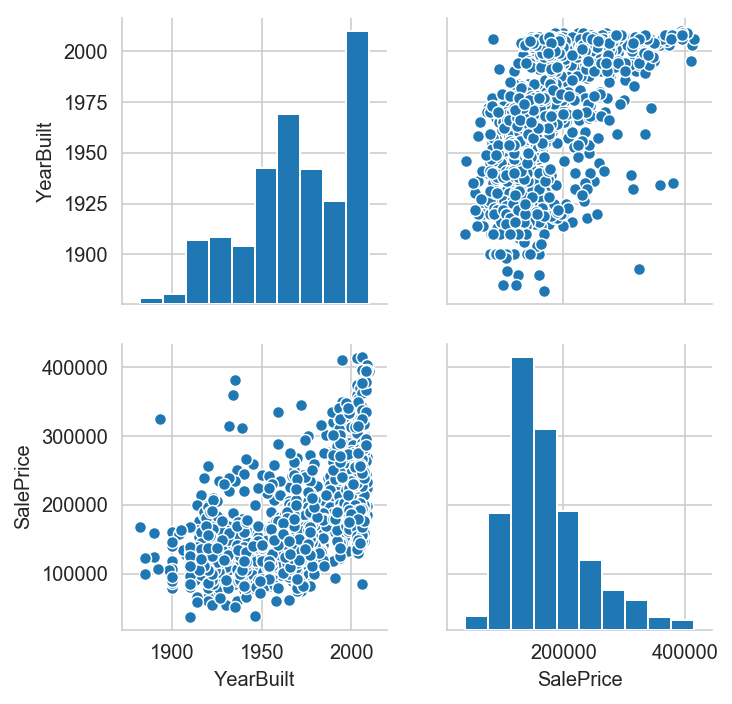

In [25]:
# Study Fixed Characteristics - 'YearBuilt'

sns.pairplot(house_NA_resi[['YearBuilt','SalePrice']])

<font color='green'>
    
### Observation:

</font>

The YearBuilt variable displays strong relationship with SalePrice, and there are no strange distribution of values or huge outliers. Logically it also makes sense that YearBuilt plays a role in determining SalePrice, as buyers generally tend to prefer more newly built homes. Hence, I will use this variable as a predictor variable. 

<font color='purple'>

## Inferences based on EDA on Fixed Characteristics Continuous Variables

</font>

Variables that seem to be the most important for predicting Sale Price:
    # Total_SF
    # FullBath
    # GrLivArea
    # TotRmsAbvGrd
    # YearBuilt

<font color='purple'>

## Move on to study Fixed Characteristics Discrete Variables

</font>

In [26]:
# For the study of the discrete features, I will study the difference in median Sale Price of the categories
# to infer if the category / variable could be an important predictor variable

# For ease of comparison of the different variables, I will use the benchmark of difference in median
# above 2* standard deviation of Sale Price as a reference

In [27]:
# Study Fixed Characteristics - 'Street','Alley'

fig, (ax1,ax2) = plt.subplots(ncols=2,nrows=1,figsize=(15,4))

sns.boxplot(house_NA_resi['SalePrice'],house_NA_resi['Street'], ax=ax1, color='r')
sns.boxplot(house_NA_resi['SalePrice'], house_NA_resi['Alley'], ax=ax2, color='b')

plt.show()

In [28]:
house_NA_resi['Alley'].value_counts()

NA      1266
Grvl      48
Pave      13
Name: Alley, dtype: int64

In [29]:
house_NA_resi['Street'].value_counts()

Pave    1324
Grvl       3
Name: Street, dtype: int64

<font color='green'>
             
### Observation:

</font>

__Street__ - The sample size that we have for Gravel is too small (only 3), and it is impossible to analyze the impact o the different types of road access on the Sale Price. It would not be appropriate to use it as a predictor variable for Sale Price. 

__Alley__ - The difference in median Sale Price for the different categories is not large. In addition, there is a significantly large proportion of houses with no alley access. The sample size in the other 2 categories are very small. Hence, I will not use Alley as a predictor variable.

In [30]:
# I will combine condition 1 and 2 to study the impact of conditions on Sale Price
# as there are very few houses with condition 2 present. 

house_NA_resi['Conditions'] = house_NA_resi['Condition1'] + house_NA_resi['Condition2']

In [31]:
# Study Fixed Characteristics - 'Conditions'

fig = plt.figure(figsize=(15,6))
ax = fig.gca()
ax = sns.boxplot(house_NA_resi['SalePrice'], house_NA_resi['Conditions'], color='r')

<font color = 'green'>

### Observation:

</font>

The presence of __RRNn, PosA and PosN__ seem to correspond with a higher Sale Price in general. Hence, I will retain this variable in the prediction of SalePrice. 

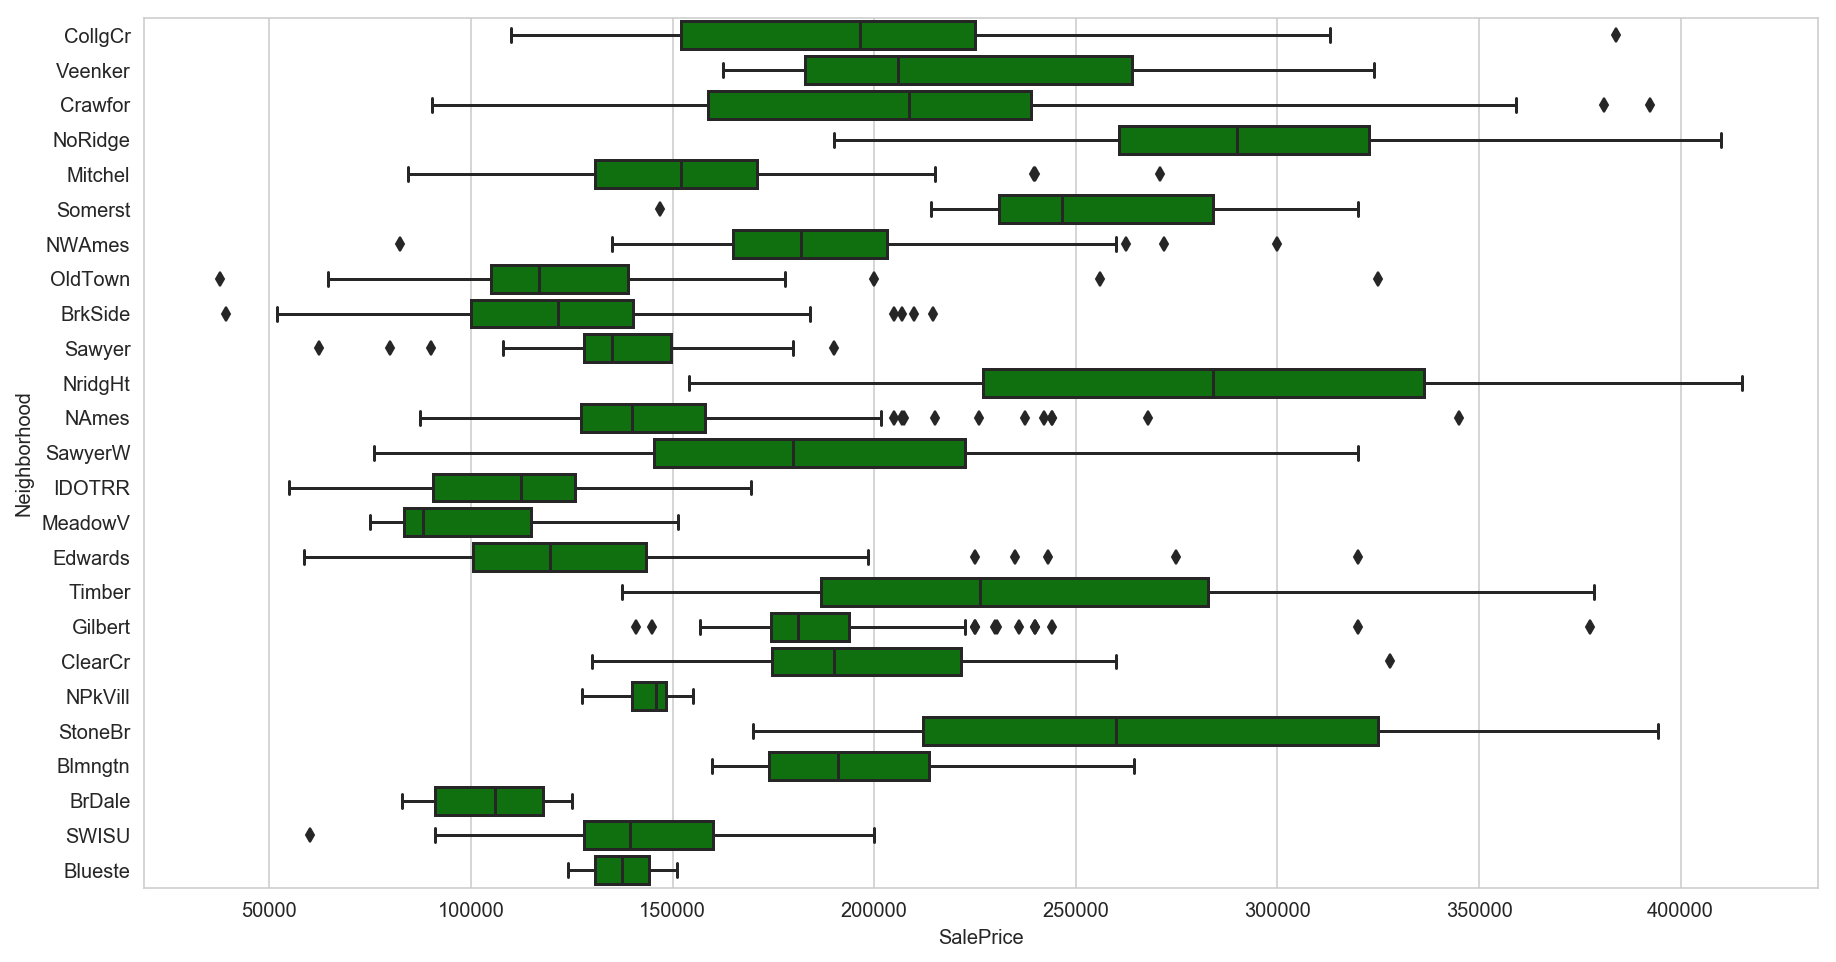

In [32]:
# Study Fixed Characteristics - 'Neighborhood'

fig = plt.figure(figsize=(15,8))
ax = fig.gca()
sns.boxplot(house_NA_resi['SalePrice'], house_NA_resi['Neighborhood'], color='g')

plt.show()

<font color='green'>
    
### Observation:

</font>

The plot shows a large spread and that each neighborhood has a very different SalePrice range. For instance, NridgHt has a much higher SalePrice range than BrDale. Hence, I will choose Neighborhood as a predictor. 

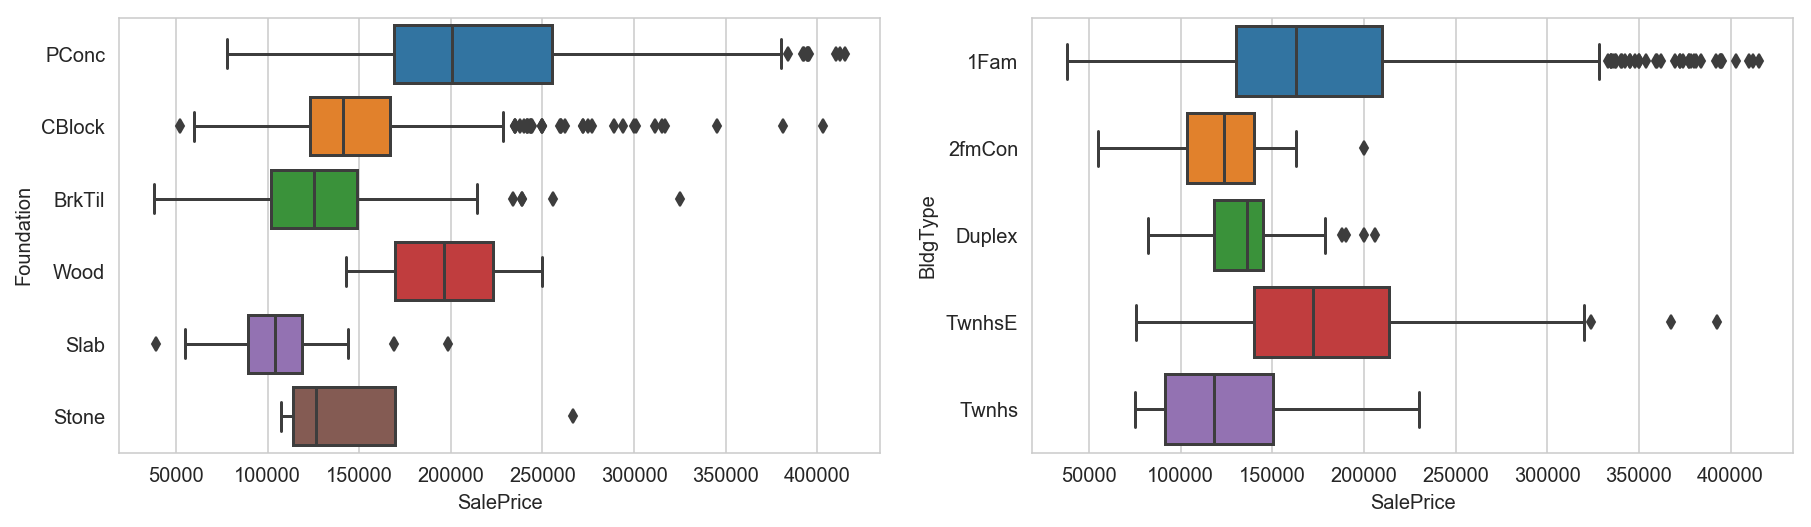

In [33]:
# Study Fixed Characteristics - 'Foundation', 'BldgType'

fig, (ax1,ax2) = plt.subplots(ncols=2,nrows=1,figsize=(15,4))

sns.boxplot(house_NA_resi['SalePrice'], house_NA_resi['Foundation'], ax = ax1)
sns.boxplot(house_NA_resi['SalePrice'], house_NA_resi['BldgType'], ax=ax2)
plt.show()

<font color='green'>

### Observation:

</font>

From the plot, both the variables do not exhibit a clear relationship in their distribution against SalePrice. The range of SalePrice does not differ much across the different categories. They are likely not variables that buyers take into consideration that much when purchasing houses. 

The plots also show that there are outliers for some of the categories. The outliers could be due to the 79 other variables' effect on price. However, I will not study the reason for the outliers in this case, since I am dropping these variables.

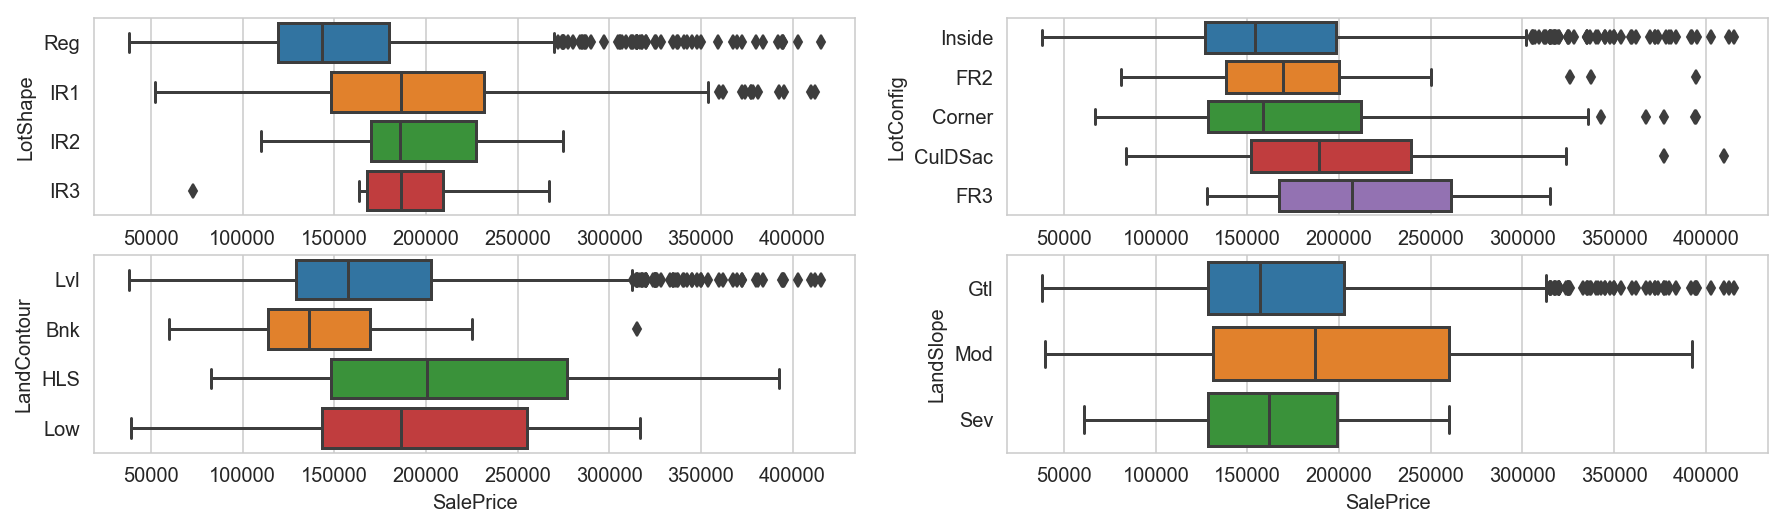

In [34]:
# Study Fixed Characteristics - 'LotShape','LotConfig', 'LandContour', 'LandSlope'

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(ncols=2,nrows=2,figsize=(15,4))

sns.boxplot(house_NA_resi['SalePrice'], house_NA_resi['LotShape'], ax=ax1)
sns.boxplot(house_NA_resi['SalePrice'], house_NA_resi['LotConfig'], ax=ax2)
sns.boxplot(house_NA_resi['SalePrice'], house_NA_resi['LandContour'], ax=ax3)
sns.boxplot(house_NA_resi['SalePrice'], house_NA_resi['LandSlope'], ax=ax4)
plt.show()

<font color='green'>

### Observation:

</font>

From the plot, all the variables do not exhibit a clear relationship in their distribution against SalePrice. The range of SalePrice does not differ much across the different categories. They are likely not variables that buyers take into consideration that much when purchasing houses. Hence, I will drop these variables.

The plots also show that there are outliers for some of the categories. The outliers could be due to the 79 other variables' effect on price. However, I will not study the reason for the outliers in this case, since I am dropping these variables.

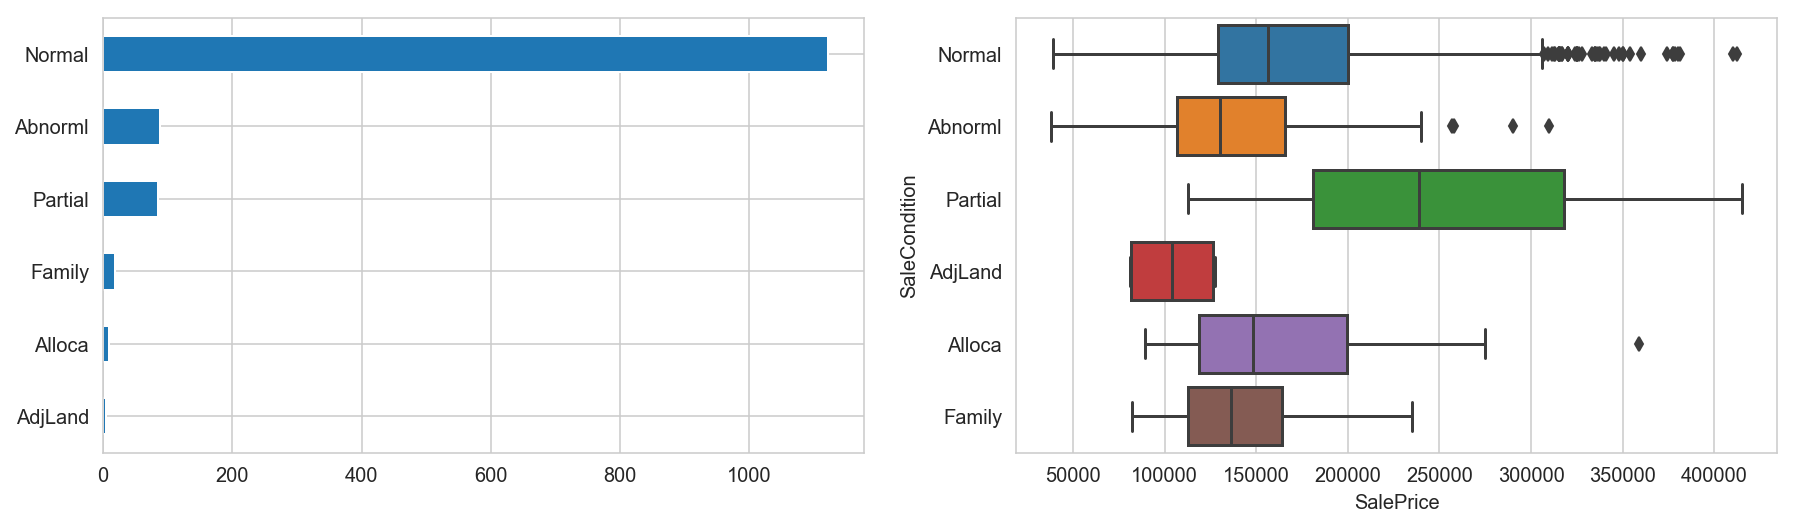

In [35]:
# Study Fixed Characteristic - 'SaleCondition'

fig, (ax1,ax2) = plt.subplots(ncols=2,nrows=1,figsize=(15,4))

house_NA_resi['SaleCondition'].value_counts().sort_values(ascending=True).plot(kind='barh', ax=ax1)
sns.boxplot(x=house_NA_resi['SalePrice'], y=house_NA_resi['SaleCondition'], ax=ax2)
plt.show()

In [36]:
house_NA_resi['SaleCondition'].value_counts()

Normal     1121
Abnorml      88
Partial      85
Family       19
Alloca       10
AdjLand       4
Name: SaleCondition, dtype: int64

<font color='green'>

### Observation:

</font>

Logically this variable should have the single largest impact on the price, as the price will likely be below market value if the Sale is under sudden conditions. However, from the plot, the difference in range of SalePrice doesn't seem to be very large. Hence, I will drop this variable. 

In [37]:
# Study Fixed Characteristics - 'SaleType'

fig = plt.figure(figsize=(8,5))
ax = fig.gca()
sns.boxplot(x=house_NA_resi['SalePrice'], y=house_NA_resi['SaleType'])
plt.show()

In [38]:
house_NA_resi['SaleType'].value_counts()

WD       1182
New        82
COD        40
ConLD       7
ConLw       5
ConLI       4
CWD         3
Oth         3
Con         1
Name: SaleType, dtype: int64

<font color='green'>

### Observation: 

</font>

I will drop this variable as 



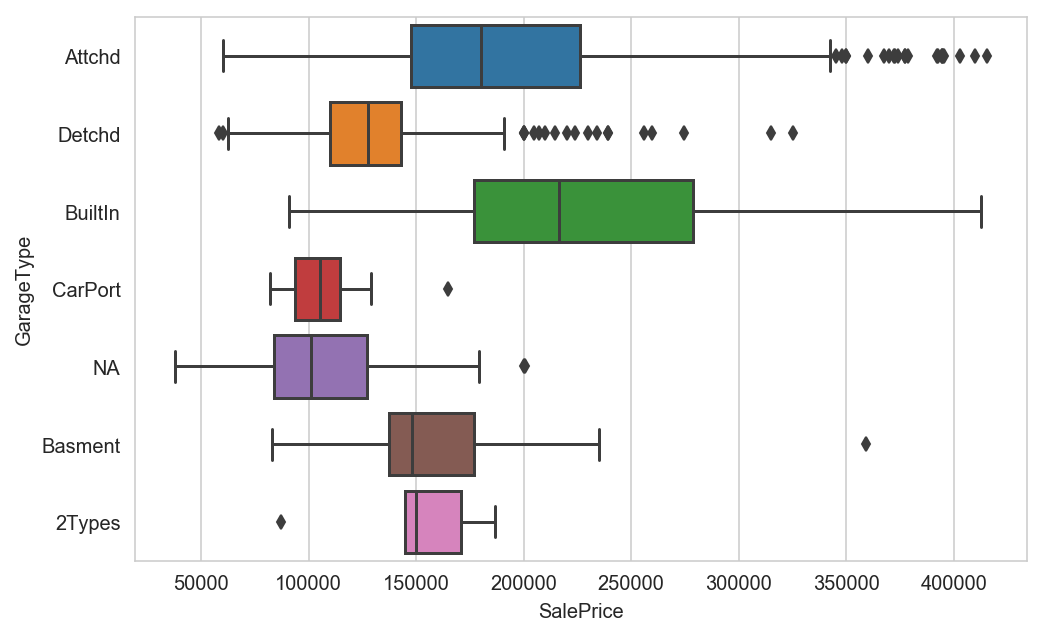

In [39]:
# Study Fixed Characteristics - 'GarageType'

fig = plt.figure(figsize=(8,5))
ax = fig.gca()
sns.boxplot(x=house_NA_resi['SalePrice'], y=house_NA_resi['GarageType'])
plt.show()

<font color='green'>

### Observation:

</font>

From the plot, there is a large difference in the SalePrice for different GarageType. Hence, I will keep this variable as a predictor.

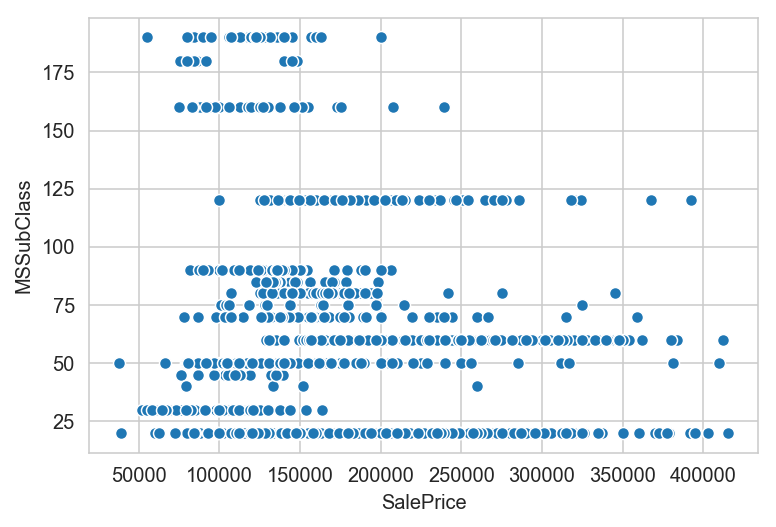

In [40]:
# Study Fixed Characteristics - 'MSSubClass'

sns.scatterplot(house_NA_resi['SalePrice'], house_NA_resi['MSSubClass'])

#### Observation: 

There is no clear pattern between MSSubClass and SalePrice. Hence, I will drop the variable. 

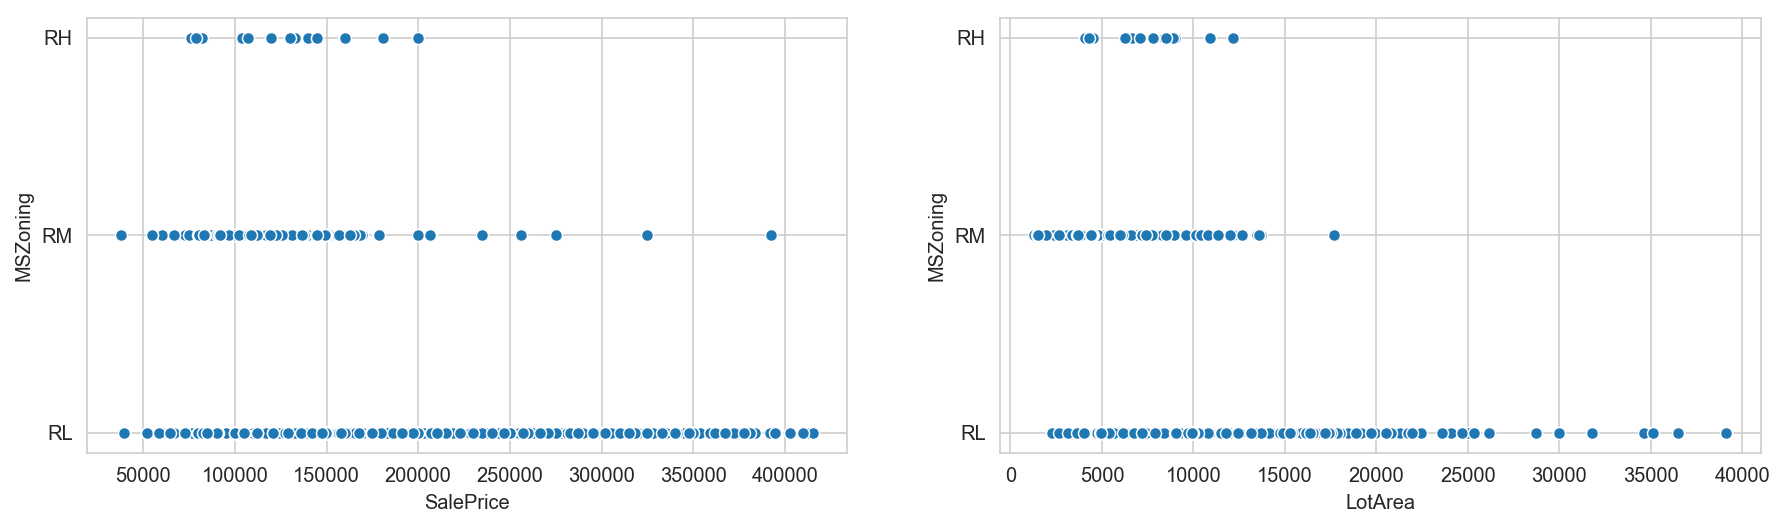

In [41]:
# Study Fixed Characteristics -'MSZoning'

fig, (ax1,ax2) = plt.subplots(ncols=2,nrows=1,figsize=(15,4))

sns.scatterplot(x=house_NA_resi['SalePrice'], y=house_NA_resi['MSZoning'], ax=ax1)
sns.scatterplot(x=house_NA_resi['LotArea'], y=house_NA_resi['MSZoning'], ax=ax2)

In [42]:
house_NA_resi['MSZoning'].value_counts()

RL    1100
RM     211
RH      16
Name: MSZoning, dtype: int64

#### Observation: 

From the plot on the left, the RL zoning seems to have a larger sales price range / variance than RM, and RL. 
As shown in the plot on the right, the LotArea is higher in residential areas with low density, the lot areas are larger and houses can be built larger, which in turn has a slight impact on the SalePrice.

However, I will not use this variable as a predictor as the RM and RH categories have very few values and hence may not show an accurate picture of the relationship of MSZoning and SalePrice.

<font color = 'purple'>

## Inferences based on EDA on Discrete Variables

</font>

Variables that seem to be the most important for predicting Sale Price:
    # Conditions
    # Neighborhood
    # SaleType
    # GarageType

<font color = 'purple'>

## Set up Predictor and Target Variables

</font>

In [43]:
# Final continuous variables
    # Included SalePrice and YrSold 
    # We need to filter based on YrSold and extract target variable from this dataframe later

predictors = house_NA_resi[['YrSold','SalePrice','Total_SF','GrLivArea','FullBath','TotRmsAbvGrd', 'YearBuilt',
                            'Conditions', 'Neighborhood','SaleCondition','SaleType','GarageType']]

In [44]:
# Get dummies for the discrete variables

predictors = pd.get_dummies(predictors, drop_first=True)

In [45]:
# Check the dataframe

predictors.head()

YrSold  SalePrice  Total_SF  GrLivArea  FullBath  TotRmsAbvGrd  YearBuilt  \
0    2008     208500      3114       1710         2             8       2003   
1    2007     181500      2984       1262         2             6       1976   
2    2008     223500      3314       1786         2             6       2001   
3    2006     140000      3115       1717         1             7       1915   
4    2008     250000      4179       2198         2             9       2000   

   Conditions_ArteryNorm  Conditions_ArteryPosA  Conditions_FeedrNorm  ...  \
0                      0                      0                     0  ...   
1                      0                      0                     1  ...   
2                      0                      0                     0  ...   
3                      0                      0                     0  ...   
4                      0                      0                     0  ...   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  GarageType_Attchd  \
0               0             0             0            1                  1   
1               0             0             0            1                  1   
2               0             0             0            1                  1   
3               0             0             0            1                  0   
4               0             0             0            1                  1   

   GarageType_Basment  GarageType_BuiltIn  GarageType_CarPort  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   GarageType_Detchd  GarageType_NA  
0                  0              0  
1                  0              0  
2                  0              0  
3                  1              0  
4                  0              0  

[5 rows x 65 columns]

In [46]:
# Split data into properties sold pre-2010 and properties sold in 2010

X = predictors[predictors['YrSold'] < 2010].iloc[:,2:]
X_holdout = predictors[predictors['YrSold'] >= 2010].iloc[:,2:]

y = predictors[predictors['YrSold'] < 2010]['SalePrice']
y_holdout = predictors[predictors['YrSold'] >= 2010]['SalePrice']

In [47]:
# Standardize the variables to ensure they are on the same scale

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_std = ss.fit_transform(X)
X_holdout_std = ss.transform(X_holdout)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  


In [48]:
# Create the train and test set for the pre 2010 data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(934, 63) (934,)
(234, 63) (234,)


<font color = 'purple'>

## Fit Linear Regression Models + Conduct Feature Selection

</font>

In [49]:
# Run a basic linear regression to check the score before optimization and regularization

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
lr_scores = cross_val_score(lr,X_std,y,cv=10)
print(lr_scores)
print(np.mean(lr_scores))

[ 8.54527529e-01  8.40722196e-01  3.31059513e-01 -1.28032071e+25
  8.16076318e-01  8.32978207e-01  8.37432055e-01  7.94716987e-01
  8.08683481e-01  7.93636940e-01]
-1.2803207108659272e+24


In [50]:
# Find the baseline score if all the features were included

import statsmodels.api as sm

X_train_stats = sm.add_constant(X_train, has_constant='add')
model = sm.OLS(y_train, X_train_stats)
model = model.fit()

In [51]:
model.summary()

# The model returns a decent R2 score

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     83.75
Date:                Sun, 21 Apr 2019   Prob (F-statistic):          4.94e-324
Time:                        16:07:32   Log-Likelihood:                -10760.
No. Observations:                 934   AIC:                         2.165e+04
Df Residuals:                     870   BIC:                         2.196e+04
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.734e+05    832.170    208.359      0.000    1.72e+05    1.75e+05
x1           3.12e+04   2093.288     14.904      0.000    2.71e+04    3.53e+04
x2          1.292e+04   2506.768      5.155      0.000    8002.458    1.78e+04
x3         -1727.8305   1292.951     -1.336      0.182   -4265.498     809.837
x4         -3334.0225   1609.867     -2.071      0.039   -6493.700    -174.345
x5          1.448e+04   2006.260      7.218      0.000    1.05e+04    1.84e+04
x6          1702.4876   3436.762      0.495      0.620   -5042.827    8447.802
x7          3643.9728    940.031      3.876      0.000    1798.980    5488.966
x8          2081.2726   4411.302      0.472      0.637   -6576.766    1.07e+04
x9         -1311.4552    951.239     -1.379      0.168   -3178.447     555.536
x10        -1216.7504    944.294     -1.289      0.198   -3070.111     636.610
x11          826.5454   1084.326      0.762      0.446   -1301.655    2954.746
x12         7115.0809   6636.373      1.072      0.284   -5910.092    2.01e+04
x13         1284.1131   1554.163      0.826      0.409   -1766.234    4334.460
x14         3224.7925   2243.564      1.437      0.151   -1178.638    7628.223
x15         -207.8331   1848.794     -0.112      0.911   -3836.450    3420.784
x16          356.7192   1220.796      0.292      0.770   -2039.331    2752.770
x17         2340.4185   2636.049      0.888      0.375   -2833.341    7514.178
x18          394.0824    940.751      0.419      0.675   -1452.325    2240.490
x19          480.1503    929.293      0.517      0.606   -1343.768    2304.068
x20         1910.8815   1248.307      1.531      0.126    -539.164    4360.927
x21         -275.7639    805.294     -0.342      0.732   -1856.309    1304.781
x22        -1291.1648   1314.949     -0.982      0.326   -3872.007    1289.678
x23         4645.5388   1978.952      2.347      0.019     761.462    8529.616
x24          579.9994   1225.675      0.473      0.636   -1825.626    2985.624
x25         2667.4499   2319.455      1.150      0.250   -1884.932    7219.832
x26         9086.6213   1778.654      5.109      0.000    5595.667    1.26e+04
x27         1166.9497   2170.497      0.538      0.591   -3093.072    5426.972
x28         2268.7747   1849.071      1.227      0.220   -1360.387    5897.936
x29         1307.2181   1467.203      0.891      0.373   -1572.454    4186.890
x30        -1979.6798   1160.167     -1.706      0.088   -4256.734     297.374
x31         -485.8156   1596.181     -0.304      0.761   -3618.631    2647.000
x32          701.2715   2838.655      0.247      0.805   -4870.142    6272.684
x33          162.6139   1037.182      0.157      0.875   -1873.058    2198.286
x34          818.8548   1861.235      0.440      0.660   -2834.180    4471.890
x35         7214.9166   1373.009      5.255      0.000    4520.118    9909.715
x3

In [52]:
# Extract the variables and the corresponding p-value from the Statsmodel summary

pvalues = pd.DataFrame([X[2:].columns, model.pvalues[1:]]).transpose()
pvalues.columns = ['Variable','p-value']

# Retrieve the variables that have p-value less than 0.05

pvalues = pvalues[pvalues['p-value'] <= 0.05]
pvalues.reset_index(drop=True, inplace=True)
pvalues['Variable'].values

array(['Total_SF', 'GrLivArea', 'TotRmsAbvGrd', 'YearBuilt',
       'Conditions_ArteryPosA', 'Neighborhood_BrkSide',
       'Neighborhood_Crawfor', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Neighborhood_Veenker', 'SaleCondition_Normal', 'SaleType_Con',
       'SaleType_WD', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_NA'], dtype=object)

In [53]:
# Try the RFE model for feature selection

from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

# Create a logistic regression estimator
lr = LinearRegression()

rfecv = RFECV(estimator=lr, step=1, cv=10)
rfecv_columns = rfecv.fit(X_std,y)

# Check the selected variables
print(rfecv_columns.support_)
print(rfecv_columns.ranking_)

[ True  True  True  True  True False  True False  True  True False  True
 False  True  True False False False False  True False False  True False
  True  True False  True False  True False False False  True  True  True
 False False False  True  True  True  True  True  True  True False  True
 False False  True False False False  True False  True  True  True  True
  True  True  True]
[ 1  1  1  1  1 24  1 23  1  1 17  1 12  1  1 27 14 25 21  1 20 13  1  5
  1  1  7  1  2  1 19  6 22  1  1  1  4  3  8  1  1  1  1  1  1  1  9  1
 26 11  1 10 18 16  1 15  1  1  1  1  1  1  1]


In [54]:
# Check the score of the model
rfecv.score(X_std,y)

0.8493108110420374

In [55]:
# Check the list of features selected using the RFE model

variable_list = []

for i, variable in enumerate(list(rfecv_columns.ranking_)):
    if variable == 1:
        variable_list.append(X.columns[i])

print(variable_list)

['Total_SF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'Conditions_ArteryPosA', 'Conditions_FeedrRRAe', 'Conditions_FeedrRRAn', 'Conditions_NormNorm', 'Conditions_PosNNorm', 'Conditions_RRAeNorm', 'Conditions_RRNnNorm', 'Neighborhood_BrkSide', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Gilbert', 'Neighborhood_MeadowV', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Normal', 'SaleType_Con', 'SaleType_New', 'SaleType_WD', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageType_NA']


<font color ='green'>

### Observation:

</font>

According to the Statsmodel, there are 26 features with pvalue < 0.05. This is less than the features from the RFE model. Hence, I will use the variables prodcuced by the Statmodel. The final features selected as predictors of SalePrice are:
    # 'Total_SF'
    # 'GrLivArea'
    # 'TotRmsAbvGrd'
    # 'YearBuilt'
    # 'Conditions_ArteryPosA'
    # 'Conditions_FeedrRRAn'
    # 'Conditions_RRNeNorm'
    # 'Neighborhood_BrkSide'
    # 'Neighborhood_Crawfor'
    # 'Neighborhood_NoRidge'
    # 'Neighborhood_NridgHt'
    # 'Neighborhood_Somerst'
    # 'Neighborhood_StoneBr'
    # 'Neighborhood_Timber'
    # 'Neighborhood_Veenker'
    # 'SaleCondition_Alloca'
    # 'SaleCondition_Normal'
    # 'SaleType_Con'
    # 'SaleType_New'
    # 'SaleType_WD'
    # 'GarageType_Attchd'
    # 'GarageType_Basment'
    # 'GarageType_BuiltIn'
    # 'GarageType_CarPort'
    # 'GarageType_Detchd'
    # 'GarageType_NA'

In [56]:
# Revise the final variables selected as predictors

predictors_selected = predictors[['YrSold','SalePrice','Total_SF', 'GrLivArea', 'TotRmsAbvGrd', 'YearBuilt', \
        'Conditions_ArteryPosA', 'Conditions_FeedrRRAn', \
        'Conditions_RRNeNorm', 'Neighborhood_BrkSide','Neighborhood_Crawfor', 'Neighborhood_NoRidge', \
        'Neighborhood_NridgHt', 'Neighborhood_Somerst','Neighborhood_StoneBr', 'Neighborhood_Timber', \
        'Neighborhood_Veenker', 'SaleCondition_Alloca', \
        'SaleCondition_Normal', 'SaleType_Con', 'SaleType_New', \
        'SaleType_WD', 'GarageType_Attchd', 'GarageType_Basment', \
        'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', \
        'GarageType_NA']]

In [57]:
# Set up the predictor and target variables

X = predictors_selected[predictors_selected['YrSold'] < 2010].iloc[:,2:]
X_holdout = predictors_selected[predictors_selected['YrSold'] >= 2010].iloc[:,2:]
y = predictors_selected[predictors_selected['YrSold'] < 2010]['SalePrice']
y_holdout = predictors_selected[predictors_selected['YrSold'] >= 2010]['SalePrice']

In [58]:
# Standardize the variables to ensure they are on the same scale

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_std = ss.fit_transform(X)
X_holdout_std = ss.transform(X_holdout)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  


In [59]:
# Run a basic linear regression to check the score before optimization and regularization

lr = LinearRegression()
lr_scores = cross_val_score(lr,X_std,y,cv=10)
print(lr_scores)
print(np.mean(lr_scores))

[ 8.49146712e-01  8.43561900e-01  8.50162446e-01 -3.96597020e+26
  8.22748757e-01  8.31648719e-01  8.23683770e-01  7.82907290e-01
  8.05822422e-01  7.88512032e-01]
-3.965970199388892e+25


In [60]:
# Use RidgeCV for regularization

from sklearn.linear_model import RidgeCV

# create an array of alpha values
alpha_range = 10.**np.arange(-5, 6)
print('min alpha: {}'.format(min(alpha_range)))
print('max alpha: {}'.format(max(alpha_range)))

# select the best alpha with RidgeCV
ridgeregcv = RidgeCV(alphas=alpha_range, normalize=False, scoring='neg_mean_squared_error', cv=10)
ridgeregcv.fit(X_std, y)

min alpha: 1e-05
max alpha: 100000.0


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RidgeCV(alphas=array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05]),
    cv=10, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring='neg_mean_squared_error', store_cv_values=False)

In [61]:
# Find the best alpha from RidgeCV

ridgeregcv.alpha_

1.0

In [62]:
# Check the score obtained to see if it is a good model

ridgeregcv.score(X_std, y)

0.8418646891455497

In [63]:
# Fit a Ridge model using the best alpha

from sklearn.linear_model import Ridge

ridgereg = Ridge(alpha=1.0)
ridgereg.fit(X_std,y)

# Test the Ridge model on the holdout dataset to check score

y_holdout_pred = ridgereg.predict(X_holdout_std)
ridgereg.score(X_holdout_std,y_holdout)

0.8362684553115992

In [64]:
# Check the mean square error of the model

from sklearn.metrics import mean_squared_error

mean_squared_error(y_holdout,y_holdout_pred)

768459638.7937864

The r2 score is acceptable at 0.836 when predicting the holdout dataset. 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovate-able features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

<font color='purple'> 

## Identify the Renovate-able characteristics

</font>

    # 'HouseStyle'
    # 'OverallQual', 'OverallCond'
    # 'YearRemodAdd',
    # 'RoofStyle', 'RoofMatl', 'Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','ExterQual', 'ExterCond'
    # 'BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1','BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF' 
    # 'Heating','HeatingQC', 'CentralAir'
    # 'Electrical', 'Utilities'
    # 'LowQualFinSF', 'Functional'
    # 'KitchenQual'
    # 'Fireplaces','FireplaceQu'
    # 'GarageFinish', 'GarageQual','GarageCond'
    # 'PavedDrive', 'Fence'
    # 'WoodDeckSF', 'OpenPorchSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch'
    # 'PoolArea', 'PoolQC',
    # 'MiscFeature', 'MiscVal'

In [65]:
renovatable = house_NA_resi[['SalePrice','HouseStyle','OverallQual', 'OverallCond','YearRemodAdd','RoofStyle', 'RoofMatl', 
                             'Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','ExterQual', 'ExterCond',
                             'BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1','BsmtFinType2', 
                             'BsmtFinSF2', 'BsmtUnfSF',
               'Heating','HeatingQC', 'CentralAir','Electrical', 'Utilities','LowQualFinSF', 'Functional',
               'KitchenQual','Fireplaces','FireplaceQu','GarageFinish', 'GarageQual','GarageCond',
               'PavedDrive', 'Fence','WoodDeckSF', 'OpenPorchSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch',
               'PoolArea', 'PoolQC','MiscFeature', 'MiscVal']]

<font color ='purple'>

## For the first part of the EDA, I will start off with studying the continuous variables first.

</font>

In [66]:
# Check the summary stats for the renovatable variables 
    # The info below is only for the continuous variables

renovatable.describe()

SalePrice  OverallQual  OverallCond  YearRemodAdd   MasVnrArea  \
count    1327.000000  1327.000000  1327.000000   1327.000000  1324.000000   
mean   172893.110776     5.987189     5.616428   1983.599096    94.679758   
std     65548.742178     1.299374     1.124847     20.586292   156.016420   
min     37900.000000     1.000000     1.000000   1950.000000     0.000000   
25%    128500.000000     5.000000     5.000000   1965.000000     0.000000   
50%    158000.000000     6.000000     5.000000   1991.000000     0.000000   
75%    203500.000000     7.000000     6.000000   2003.000000   160.000000   
max    415298.000000    10.000000     9.000000   2010.000000  1115.000000   

        BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  LowQualFinSF   Fireplaces  \
count  1327.000000  1327.000000  1327.000000   1327.000000  1327.000000   
mean    427.090430    48.891485   556.242653      4.981914     0.601356   
std     412.899044   165.703064   434.454935     44.797749     0.637040   
min       0.000000     0.000000     0.000000      0.000000     0.000000   
25%       0.000000     0.000000   216.000000      0.000000     0.000000   
50%     378.000000     0.000000   468.000000      0.000000     1.000000   
75%     697.000000     0.000000   796.500000      0.000000     1.000000   
max    1880.000000  1474.000000  2153.000000    528.000000     3.000000   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1327.000000  1327.000000    1327.000000  1327.000000  1327.000000   
mean     92.978900    41.938960      21.738508     3.751319    15.474755   
std     122.049138    61.317376      59.142772    30.731626    56.224052   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    20.000000       0.000000     0.000000     0.000000   
75%     168.000000    63.000000       0.000000     0.000000     0.000000   
max     736.000000   547.000000     330.000000   508.000000   480.000000   

          PoolArea       MiscVal  
count  1327.000000   1327.000000  
mean      1.869631     46.480784  
std      34.311219    519.566812  
min       0.000000      0.000000  
25%       0.000000      0.000000  
50%       0.000000      0.000000  
75%       0.000000      0.000000  
max     738.000000  15500.000000

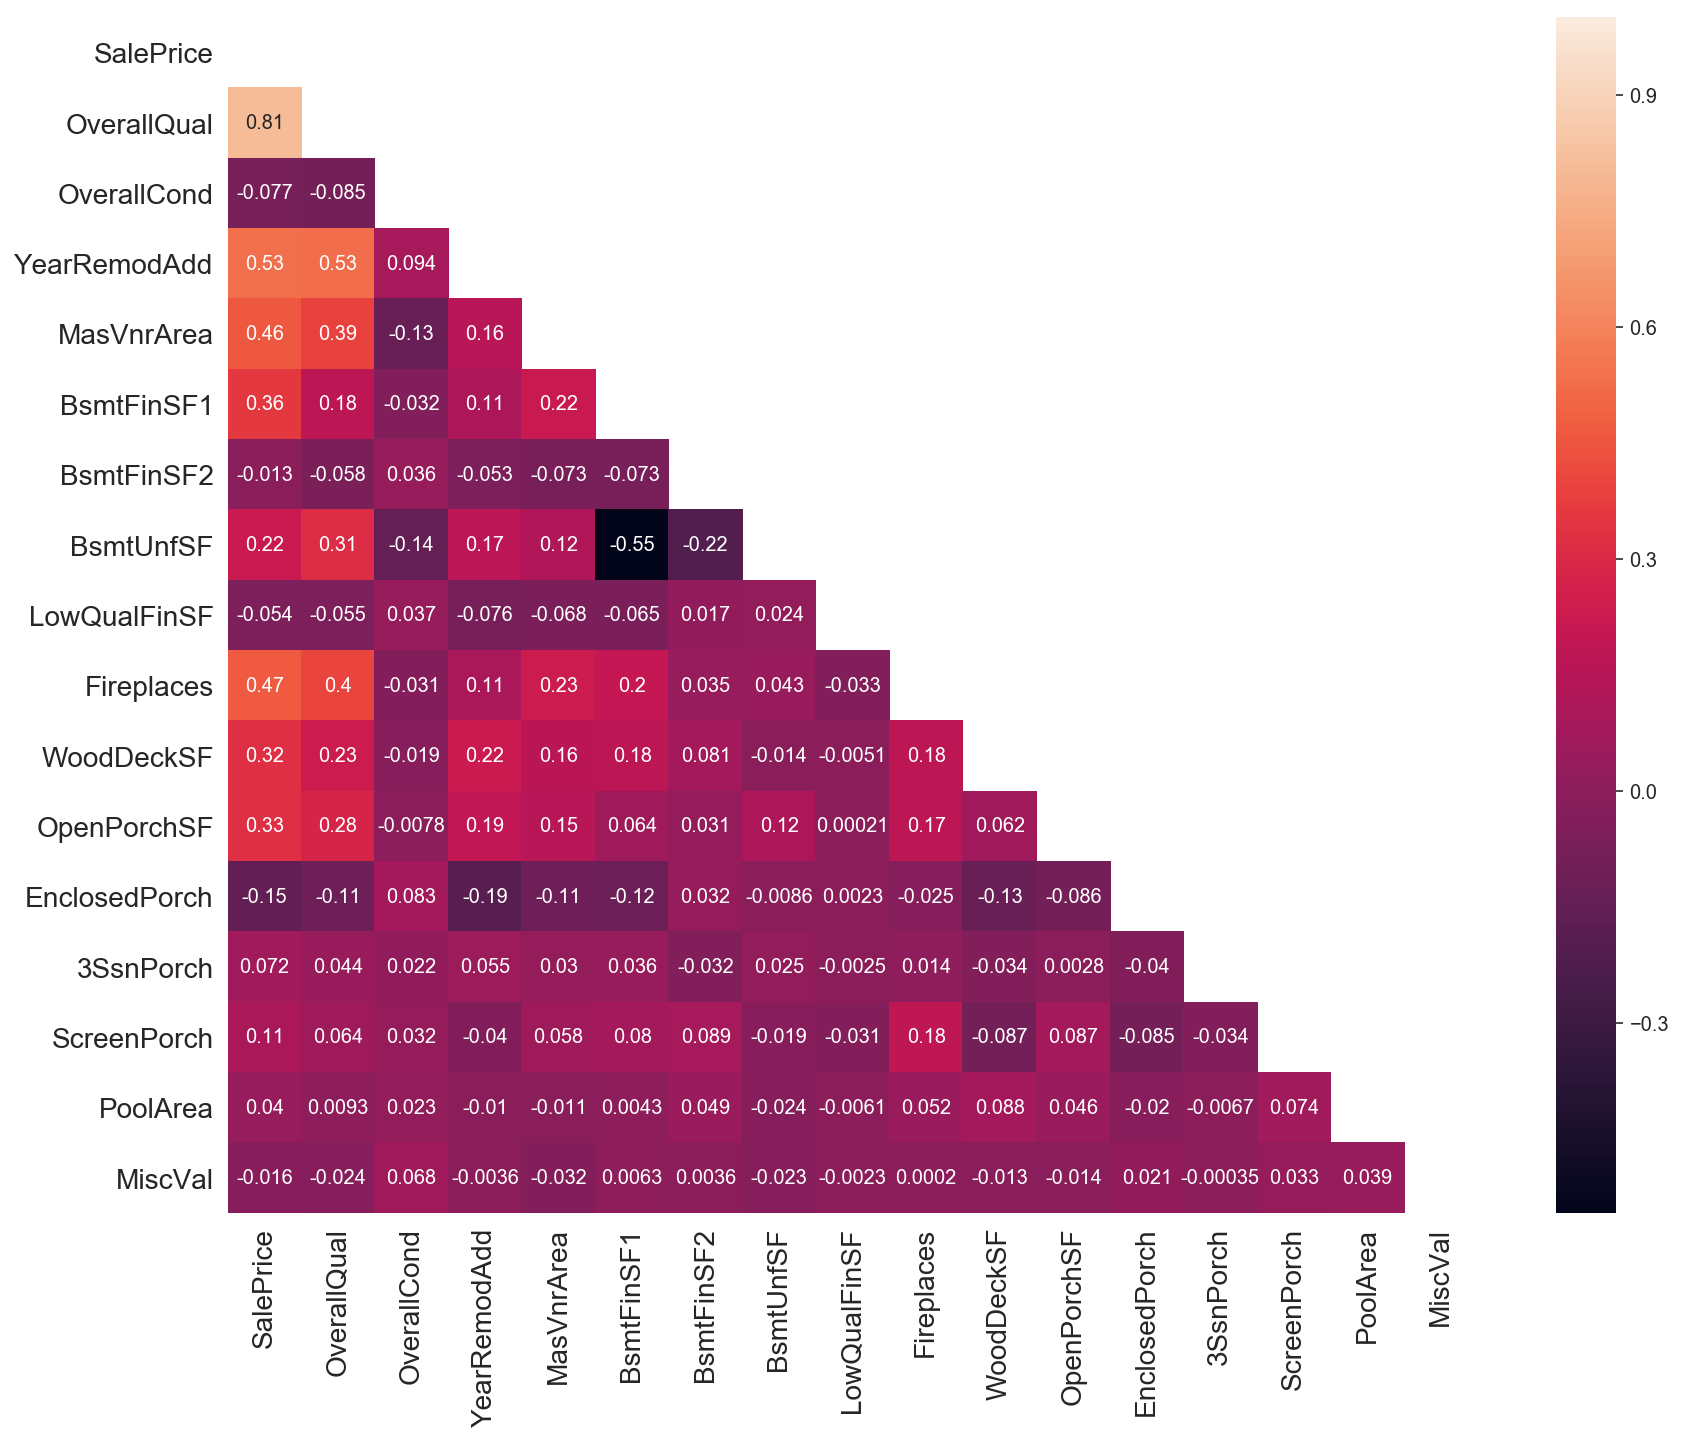

In [67]:
# Plot a heatmap of the linear correlation between the continuous characteristics and price

# Set the default matplotlib figure size to 7x7.
fix, ax = plt.subplots(figsize=(14,11))

# Generate a mask for the upper triangle (taken from Seaborn's example gallery).
mask = np.zeros_like(renovatable.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with Seaborn.
# Assign the matplotlib axis the function returns. This will allow us to resize the labels.
ax = sns.heatmap(renovatable.corr(), mask=mask, ax=ax, annot=True)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

plt.show()

<font color = 'green'>

### Observation:

</font>

Apart from the OverallQual and YearRemodAdd variable, the other variables do not exhibit a strong or moderate correlation with the SalePrice. The correlation coefficients of the other variables are all less than 0.5. 

I will include __OverallQual__ and __YearRemodAdd__, variables with the highest correlation coefficient as predictor variables. 

Also, I will continue to do further EDA and feature engineering to get a better understanding of the relationship of the variables. 

In [68]:
# Study Renovatable Characteristic - 'MiscFeature'

house_NA_resi['MiscFeature'].value_counts()

NA      1277
Shed      45
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

<font color ='green'>

### Observation: 

</font>

Based on the heatmap plot above, MiscVal does not show a strong correlation with the Sale Price. In addition, most of the houses in the dataset do not have any MiscFeature and the sample size for houses with MiscFeature is too small. Hence, I will not include these 2 variables as predictors.

In [69]:
# The variables measuring size of outdoor porches do not show a strong correlation with the SalePrice
# However, from research, outdoor porches are preferred. Hence, I will try using the sum of size of outdoor porches
# as predictors. 
# At the same time, enclosed porch also doesn't show a strong correlation with SalePrice, 
# hence I will not include the variable, and will drop it.

# Conduct feature engineering -'WoodDeckSF', 'OpenPorchSF','3SsnPorch','ScreenPorch'

house_NA_resi['OutdoorArea'] = house_NA_resi['WoodDeckSF']+ house_NA_resi['OpenPorchSF'] + \
                                house_NA_resi['3SsnPorch'] + house_NA_resi['ScreenPorch']

In [70]:
house_NA_resi[['OutdoorArea','SalePrice']].corr()

OutdoorArea  SalePrice
OutdoorArea     1.000000   0.449866
SalePrice       0.449866   1.000000

<font color ='green'>

### Observation: 

</font>

After simple feature engineering, the correlation coefficient for the porch sizes to SalePrice has increased. Even though the correlation coefficient is still less than 0.5, I will use the variable as a predictor. This is because online research shows that buyers do value outdoor porches. 

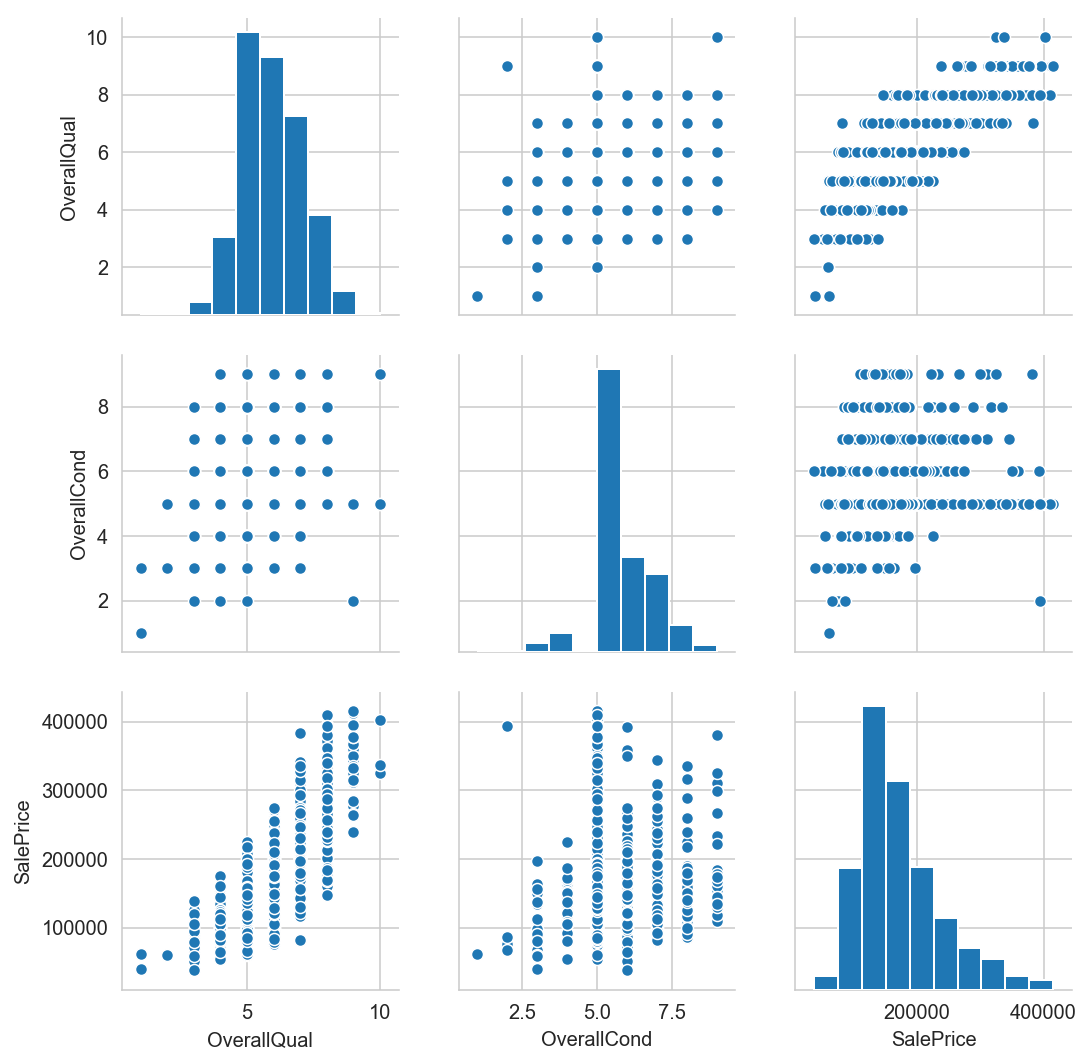

In [71]:
# Study renovatable characteristic - 'OverallQual', 'OverallCond'

sns.pairplot(house_NA_resi[['OverallQual','OverallCond','SalePrice']])

In [72]:
house_NA_resi['OverallCond'].value_counts()

5    718
6    242
7    199
8     70
4     50
3     23
9     20
2      4
1      1
Name: OverallCond, dtype: int64

<font color ='green'>

### Observation:

</font>

__Overall Quality__ - From the plot, there seems to be a good clear positive relationship between OverallQual and SalePrice. 

__Overall Condition__ - From the plot and the value_counts done above, the distribution of this variable shows that most ratings of the houses are around 5-7 points. Very few other houses were rated differently. The sample size for the lower/higher scores is too small to be used for a reliable inference and prediction. Hence, I will drop this variable. 

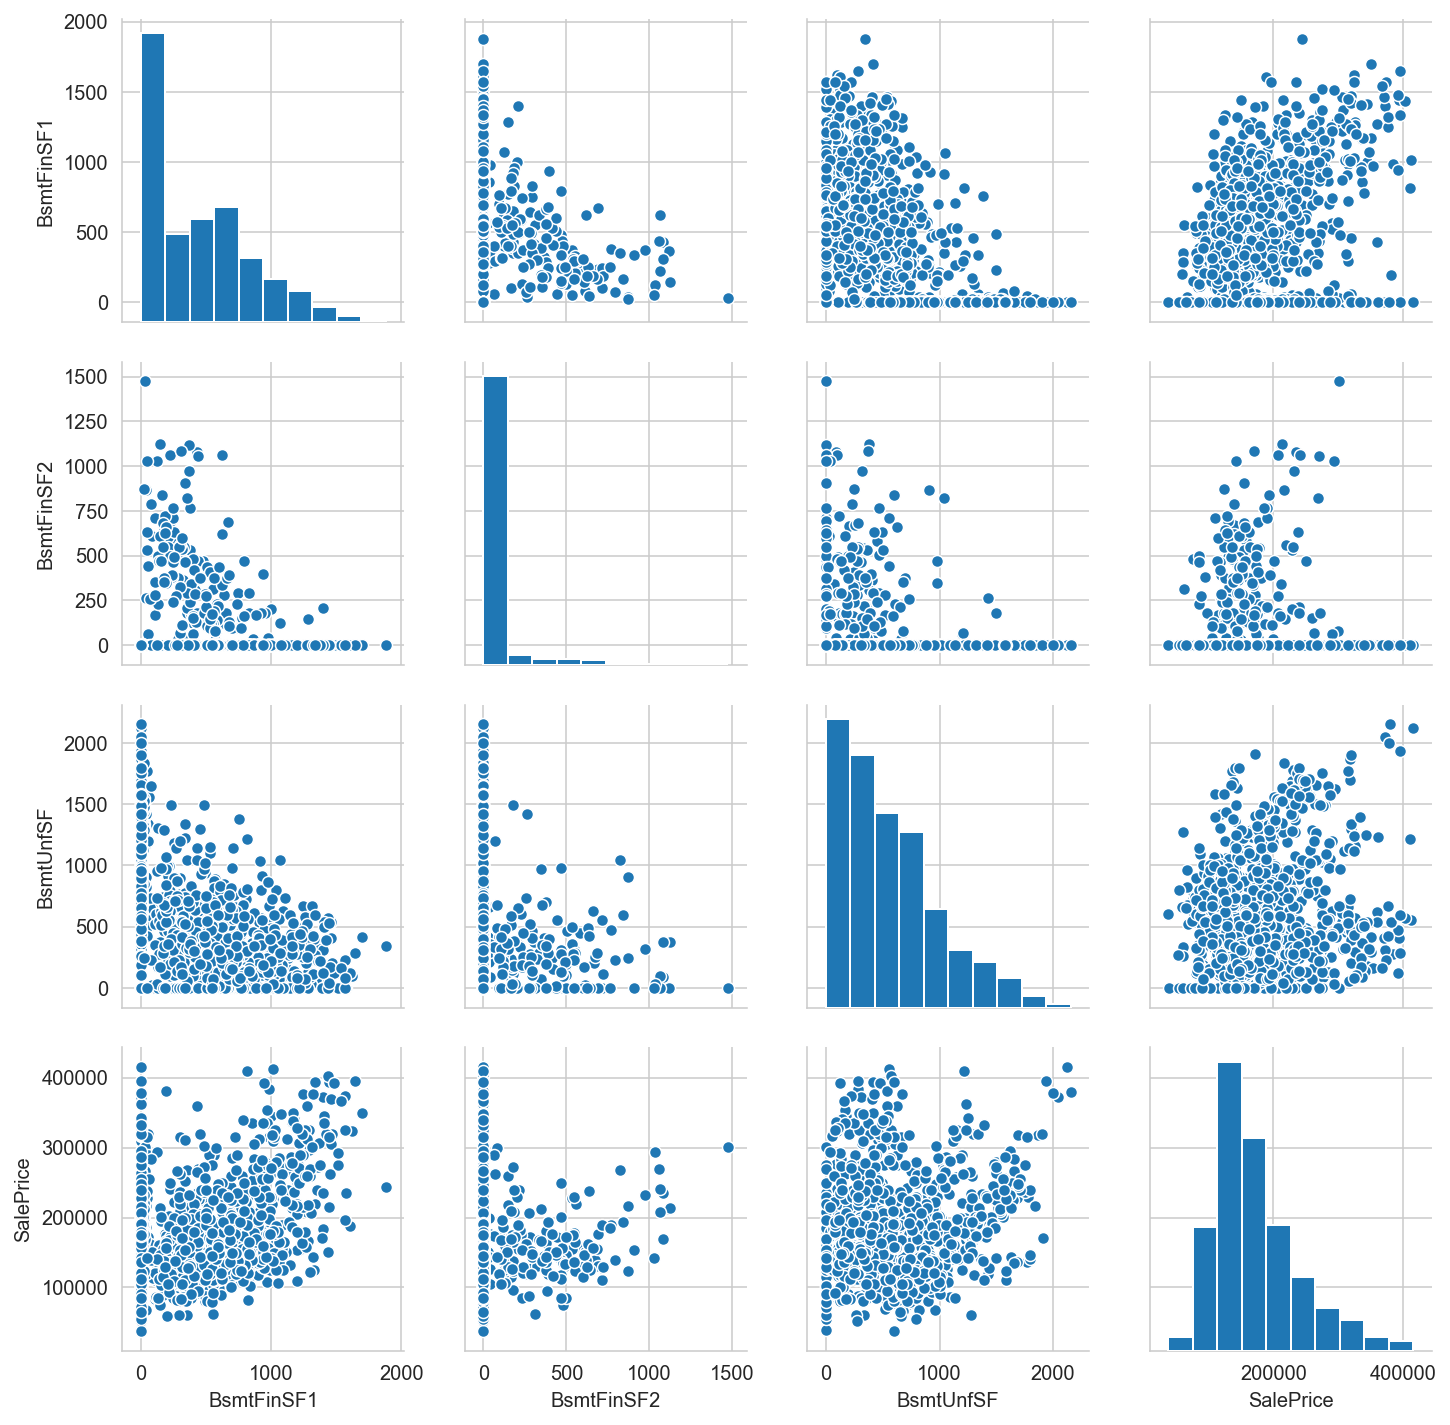

In [73]:
# Study renovatable characteristic - 'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'

sns.pairplot(house_NA_resi[['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','SalePrice']])

<font color ='green'>

### Observation:

</font>

I will select BsmtFinSF1 as a predictor variable, as it shows the clearest relationship with SalePrice from the plot. Also, as seen from the plot, most of the houses only have 1 type of finished basement. Hence I will drop BsmtFinSF2. 

From the plot, BsmtUnfSF shows a weak positive correaltion with SalePrice. Logically, a higher SF of finished basement rather than unfinished basement should fetch a higher SalePrice. Hence, I will not include this variable. Further study can be done in future to find out the reason for the positive correlation with SalePrice. 

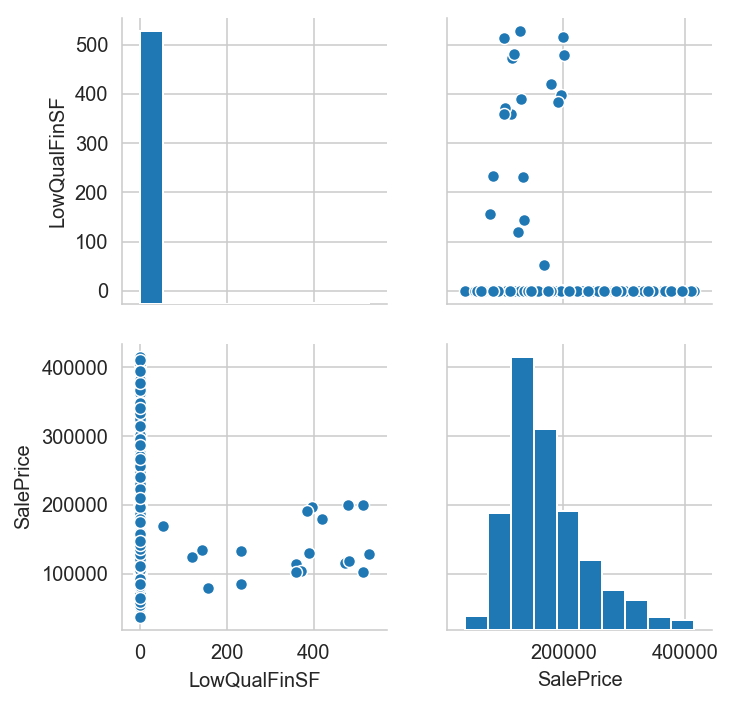

In [74]:
# Study renovatable characteristics - 'LowQualFinSF'

sns.pairplot(house_NA_resi[['LowQualFinSF','SalePrice']])

<font color ='green'>

### Observation:

</font>

I will drop LowQualFinSF, as the bulk of the houses have 0 for this variable as seen from the plot. Hence, it is likely will not produce a meaningful prediction based on this variable.

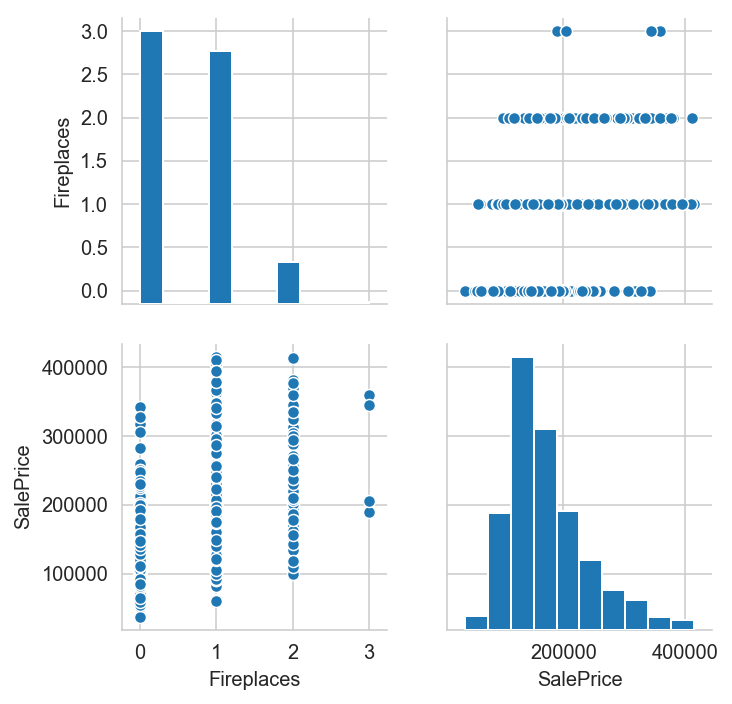

In [75]:
# Study Renovatable Characteristics - 'FirePlaces'

sns.pairplot(house_NA_resi[['Fireplaces','SalePrice']])

In [76]:
house_NA_resi['Fireplaces'].value_counts()

0    635
1    590
2     98
3      4
Name: Fireplaces, dtype: int64

<font color ='green'>

### Observation:

</font>

I will keep FirePlaces as a predictor variable, as the plot shows a relationship between Fireplaces and SalePrice. The distribution of the variable is also provides sufficient samples to study and potentially predict the effect of different number of fireplaces on SalePrices. 

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


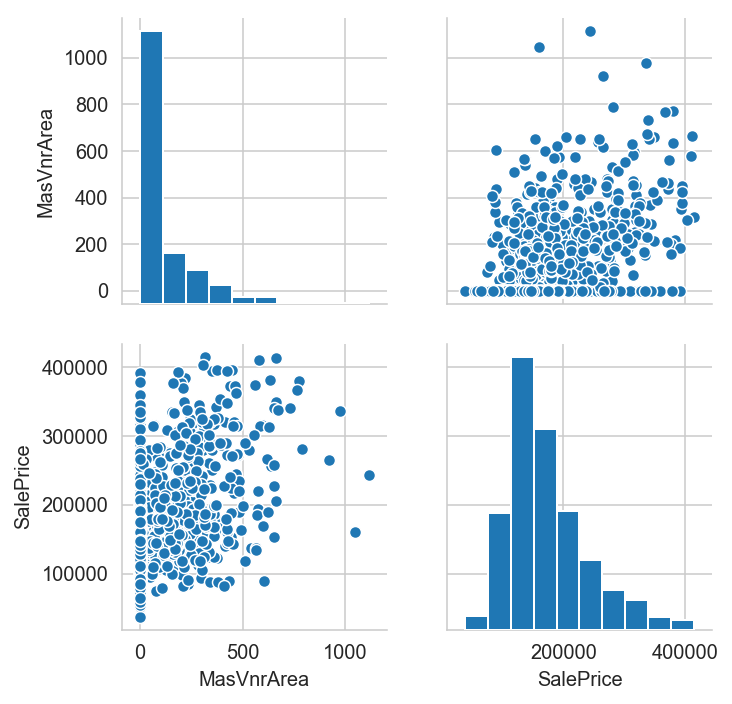

In [77]:
# Study Renovatable Characteristics - 'MasVnrArea'

sns.pairplot(house_NA_resi[['MasVnrArea','SalePrice']])

<font color ='green'>

### Observation:

</font>

I will drop MasVnrArea as a predictor variable as the distribution of the variable is too skewed. It seems like most of the houses do not have any Masonry veneer. Hence, it also may not make sense to use this variable to predict SalePrice. 

<font color='purple'>

## Inferences based on EDA on Continuous Variables

</font>

Renovatable variables that seem to be the most important for predicting Sale Price:
    # OverallQual
    # YearRemodAdd
    # OutdoorArea
    # Fireplaces
    # BsmtFinSF1

<font color ='purple'>

## Next, study the discrete variables

</font>

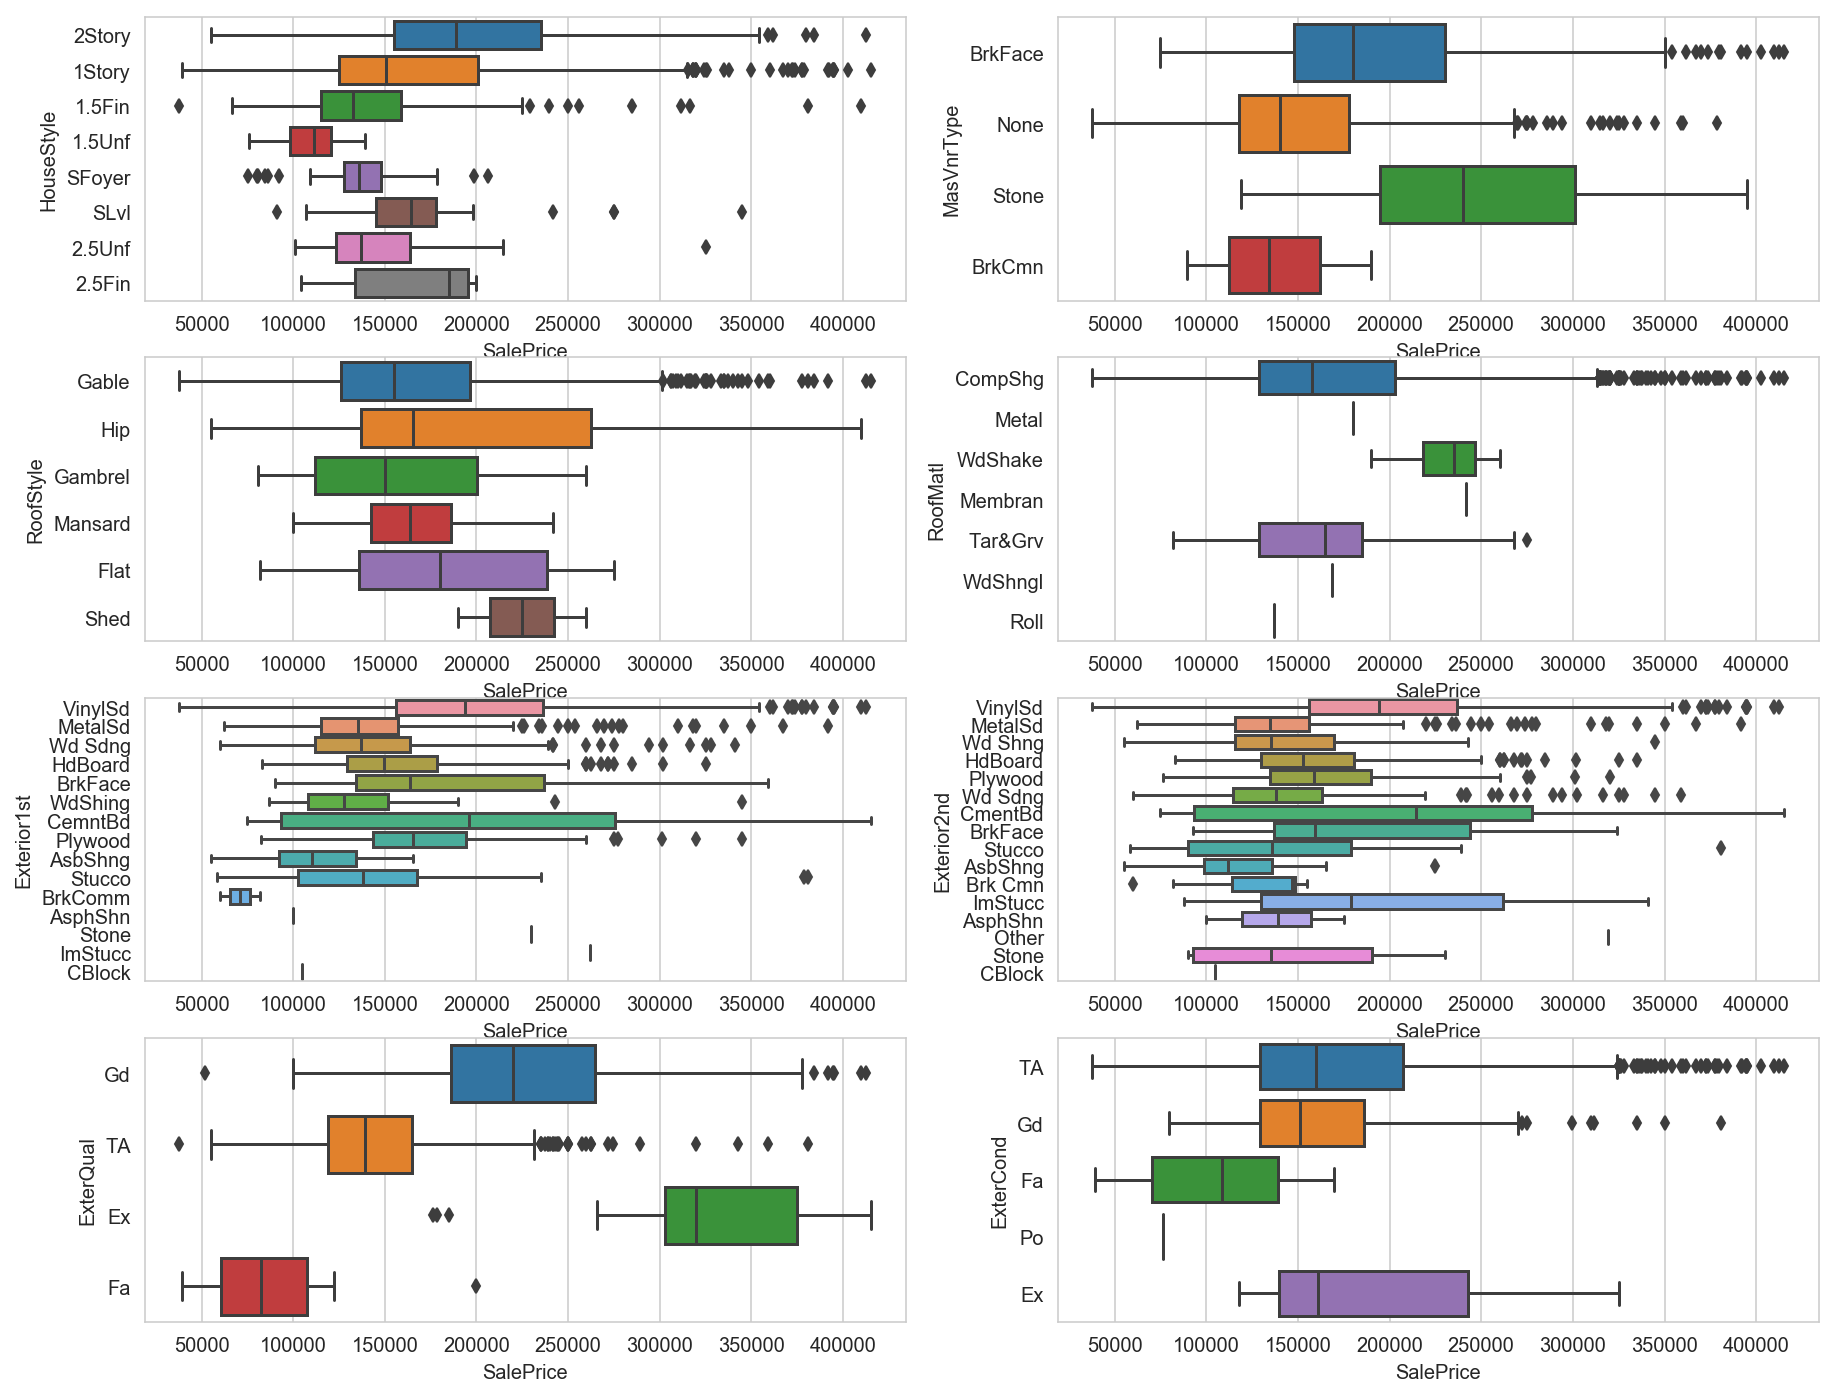

In [78]:
# Study Renovatable characteristics - 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
# 'MasVnrType', 'ExterQual', 'ExterCond'

fig, ((ax1,ax2),(ax3,ax4), (ax5,ax6), (ax7, ax8)) = plt.subplots(ncols=2,nrows=4,figsize=(15,12))

sns.boxplot(house_NA_resi['SalePrice'], house_NA_resi['HouseStyle'], ax=ax1)
sns.boxplot(house_NA_resi['SalePrice'], house_NA_resi['RoofStyle'], ax=ax3)
sns.boxplot(house_NA_resi['SalePrice'], house_NA_resi['RoofMatl'], ax=ax4)
sns.boxplot(house_NA_resi['SalePrice'], house_NA_resi['Exterior1st'], ax=ax5)
sns.boxplot(house_NA_resi['SalePrice'], house_NA_resi['Exterior2nd'], ax=ax6)
sns.boxplot(house_NA_resi['SalePrice'], house_NA_resi['MasVnrType'], ax=ax2)
sns.boxplot(house_NA_resi['SalePrice'], house_NA_resi['ExterQual'], ax=ax7)
sns.boxplot(house_NA_resi['SalePrice'], house_NA_resi['ExterCond'], ax=ax8)
plt.show()

In [79]:
house_NA_resi['ExterQual'].value_counts()

TA    877
Gd    409
Ex     30
Fa     11
Name: ExterQual, dtype: int64

In [80]:
house_NA_resi['Exterior1st'].value_counts()

VinylSd    458
HdBoard    219
Wd Sdng    193
MetalSd    190
Plywood    103
CemntBd     46
BrkFace     46
WdShing     25
Stucco      22
AsbShng     19
BrkComm      2
ImStucc      1
Stone        1
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64

In [81]:
house_NA_resi['MasVnrType'].value_counts()

None       788
BrkFace    419
Stone      103
BrkCmn      14
Name: MasVnrType, dtype: int64

<font color ='green'>

### Observation:

</font>

From the plot, most of the variables do not exhibit a large difference in SalePrice for the different categories. The variables that show a large difference in SalePrice are ExterQual, Exterior1st and MasVnrType. 

After checking the distribution of these 3 variables, I will keep __ExterQual__ and __MasVnrType__ as predictor variables. 

I will drop Exterior1st, as the category that shows a large difference in SalePrice compared with other categories (i.e. BrkComm), only has a sample size of 2. Hence, it may not be accurate to use it for prediction.

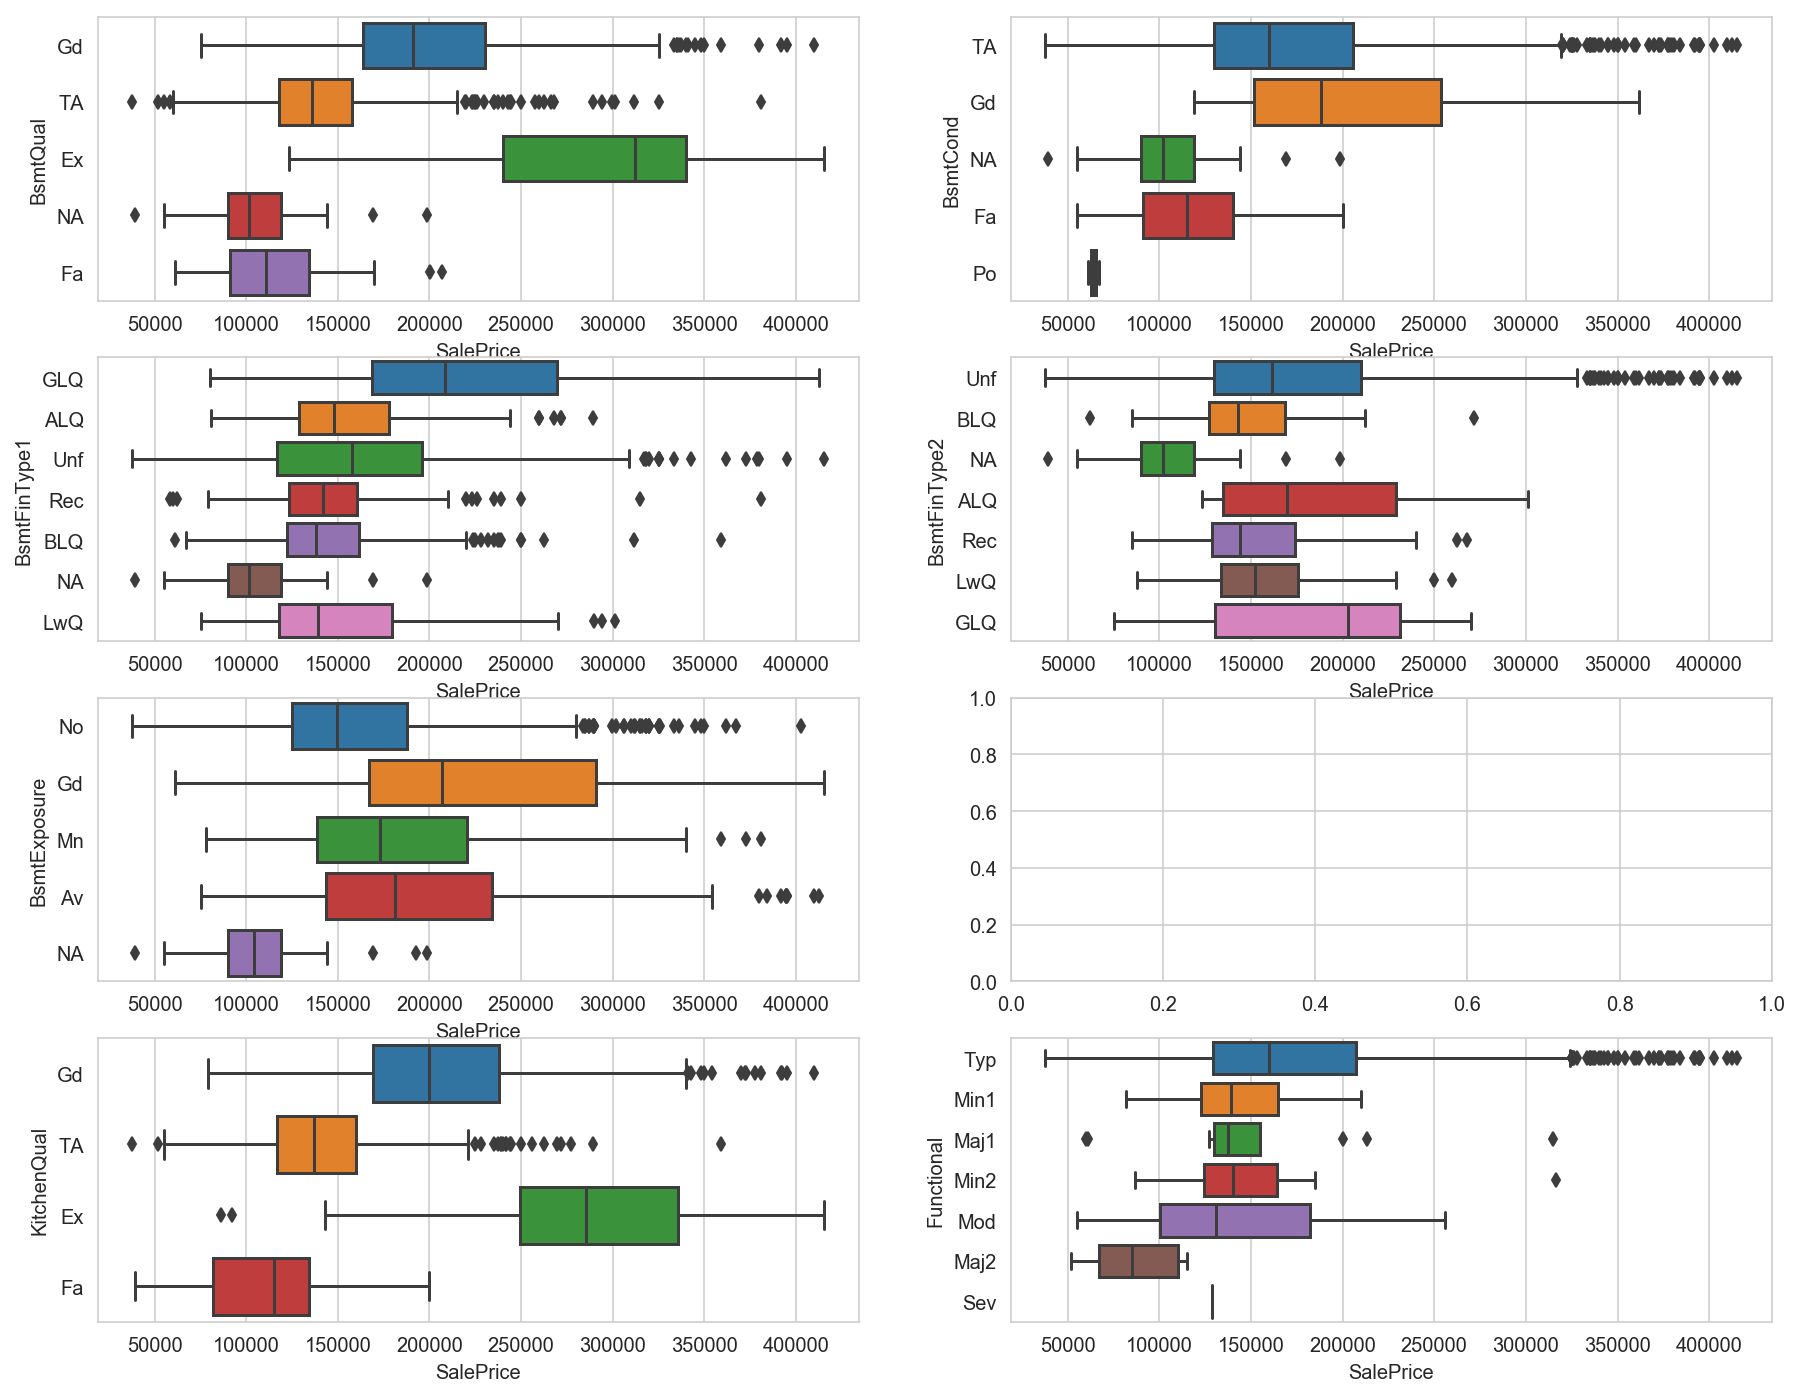

In [82]:
# Study Renovatable characteristics - 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
# 'KitchenQual', 'Functional'

fig, ((ax1,ax2),(ax3,ax4), (ax5,ax6), (ax7, ax8)) = plt.subplots(ncols=2,nrows=4,figsize=(15,12))

sns.boxplot(house_NA_resi['SalePrice'], house_NA_resi['BsmtQual'], ax=ax1)
sns.boxplot(house_NA_resi['SalePrice'], house_NA_resi['BsmtCond'], ax=ax2)
sns.boxplot(house_NA_resi['SalePrice'], house_NA_resi['BsmtExposure'], ax=ax5)
sns.boxplot(house_NA_resi['SalePrice'], house_NA_resi['BsmtFinType1'], ax=ax3)
sns.boxplot(house_NA_resi['SalePrice'], house_NA_resi['BsmtFinType2'], ax=ax4)
sns.boxplot(house_NA_resi['SalePrice'], house_NA_resi['KitchenQual'], ax=ax7)
sns.boxplot(house_NA_resi['SalePrice'], house_NA_resi['Functional'], ax=ax8)
plt.show()

In [83]:
house_NA_resi['BsmtQual'].value_counts()

TA    625
Gd    544
Ex     87
NA     37
Fa     34
Name: BsmtQual, dtype: int64

In [84]:
house_NA_resi['KitchenQual'].value_counts()

TA    714
Gd    506
Ex     72
Fa     35
Name: KitchenQual, dtype: int64

In [85]:
house_NA_resi['BsmtExposure'].value_counts()

No    877
Av    199
Gd    110
Mn    103
NA     38
Name: BsmtExposure, dtype: int64

In [86]:
house_NA_resi['BsmtFinType1'].value_counts()

Unf    383
GLQ    353
ALQ    212
BLQ    142
Rec    127
LwQ     73
NA      37
Name: BsmtFinType1, dtype: int64

<font color ='green'>

### Observation:

</font>

From the plot, most of the variables do not exhibit a large difference in SalePrice for the different categories. The variables that show a large difference in SalePrice are __BsmtQual, KitchenQual, BsmtExposure and BsmtFinType1__.

After checking the distribution of these 3 variables, I will keep all 4 of the variables as there is sufficient samples distributed across the different categories that show a large difference in SalePrice.

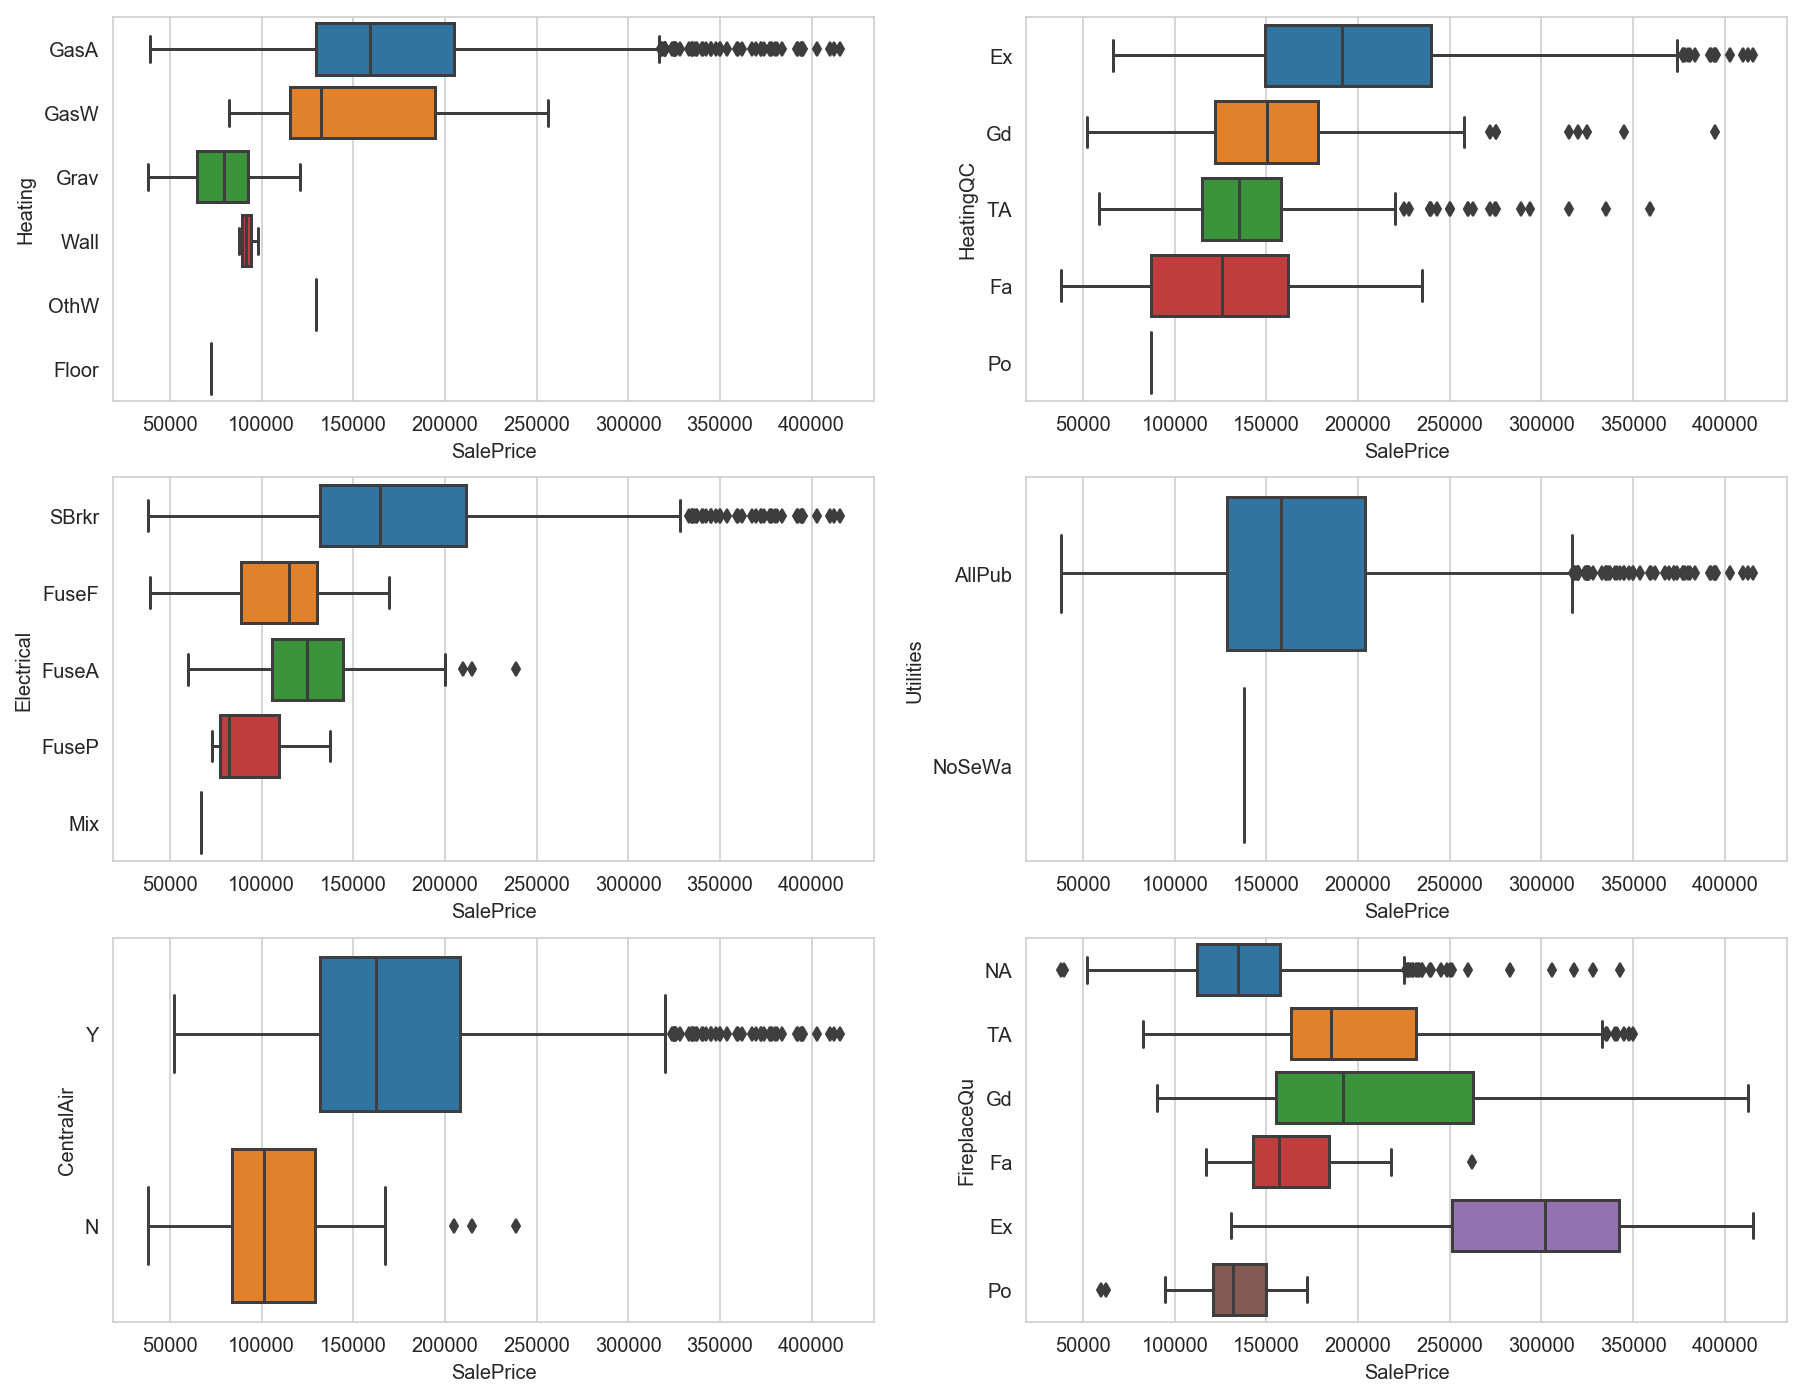

In [87]:
# Study Renovatable characteristics - 'Heating','HeatingQC','CentralAir','Electrical','Utilities','FireplaceQu'

fig, ((ax1,ax2),(ax3,ax4), (ax5,ax6)) = plt.subplots(ncols=2,nrows=3,figsize=(15,12))

sns.boxplot(house_NA_resi['SalePrice'], house_NA_resi['Heating'], ax=ax1)
sns.boxplot(house_NA_resi['SalePrice'], house_NA_resi['HeatingQC'], ax=ax2)
sns.boxplot(house_NA_resi['SalePrice'], house_NA_resi['CentralAir'], ax=ax5)
sns.boxplot(house_NA_resi['SalePrice'], house_NA_resi['Electrical'], ax=ax3)
sns.boxplot(house_NA_resi['SalePrice'], house_NA_resi['Utilities'], ax=ax4)
sns.boxplot(house_NA_resi['SalePrice'], house_NA_resi['FireplaceQu'], ax=ax6)

In [88]:
house_NA_resi['FireplaceQu'].value_counts()

NA    635
Gd    333
TA    293
Fa     31
Po     20
Ex     15
Name: FireplaceQu, dtype: int64

<font color ='green'>

### Observation:

</font>

From the plot, most of the variables do not exhibit a large difference in SalePrice for the different categories. The variable that show a large difference in SalePrice is __FireplaceQu__.

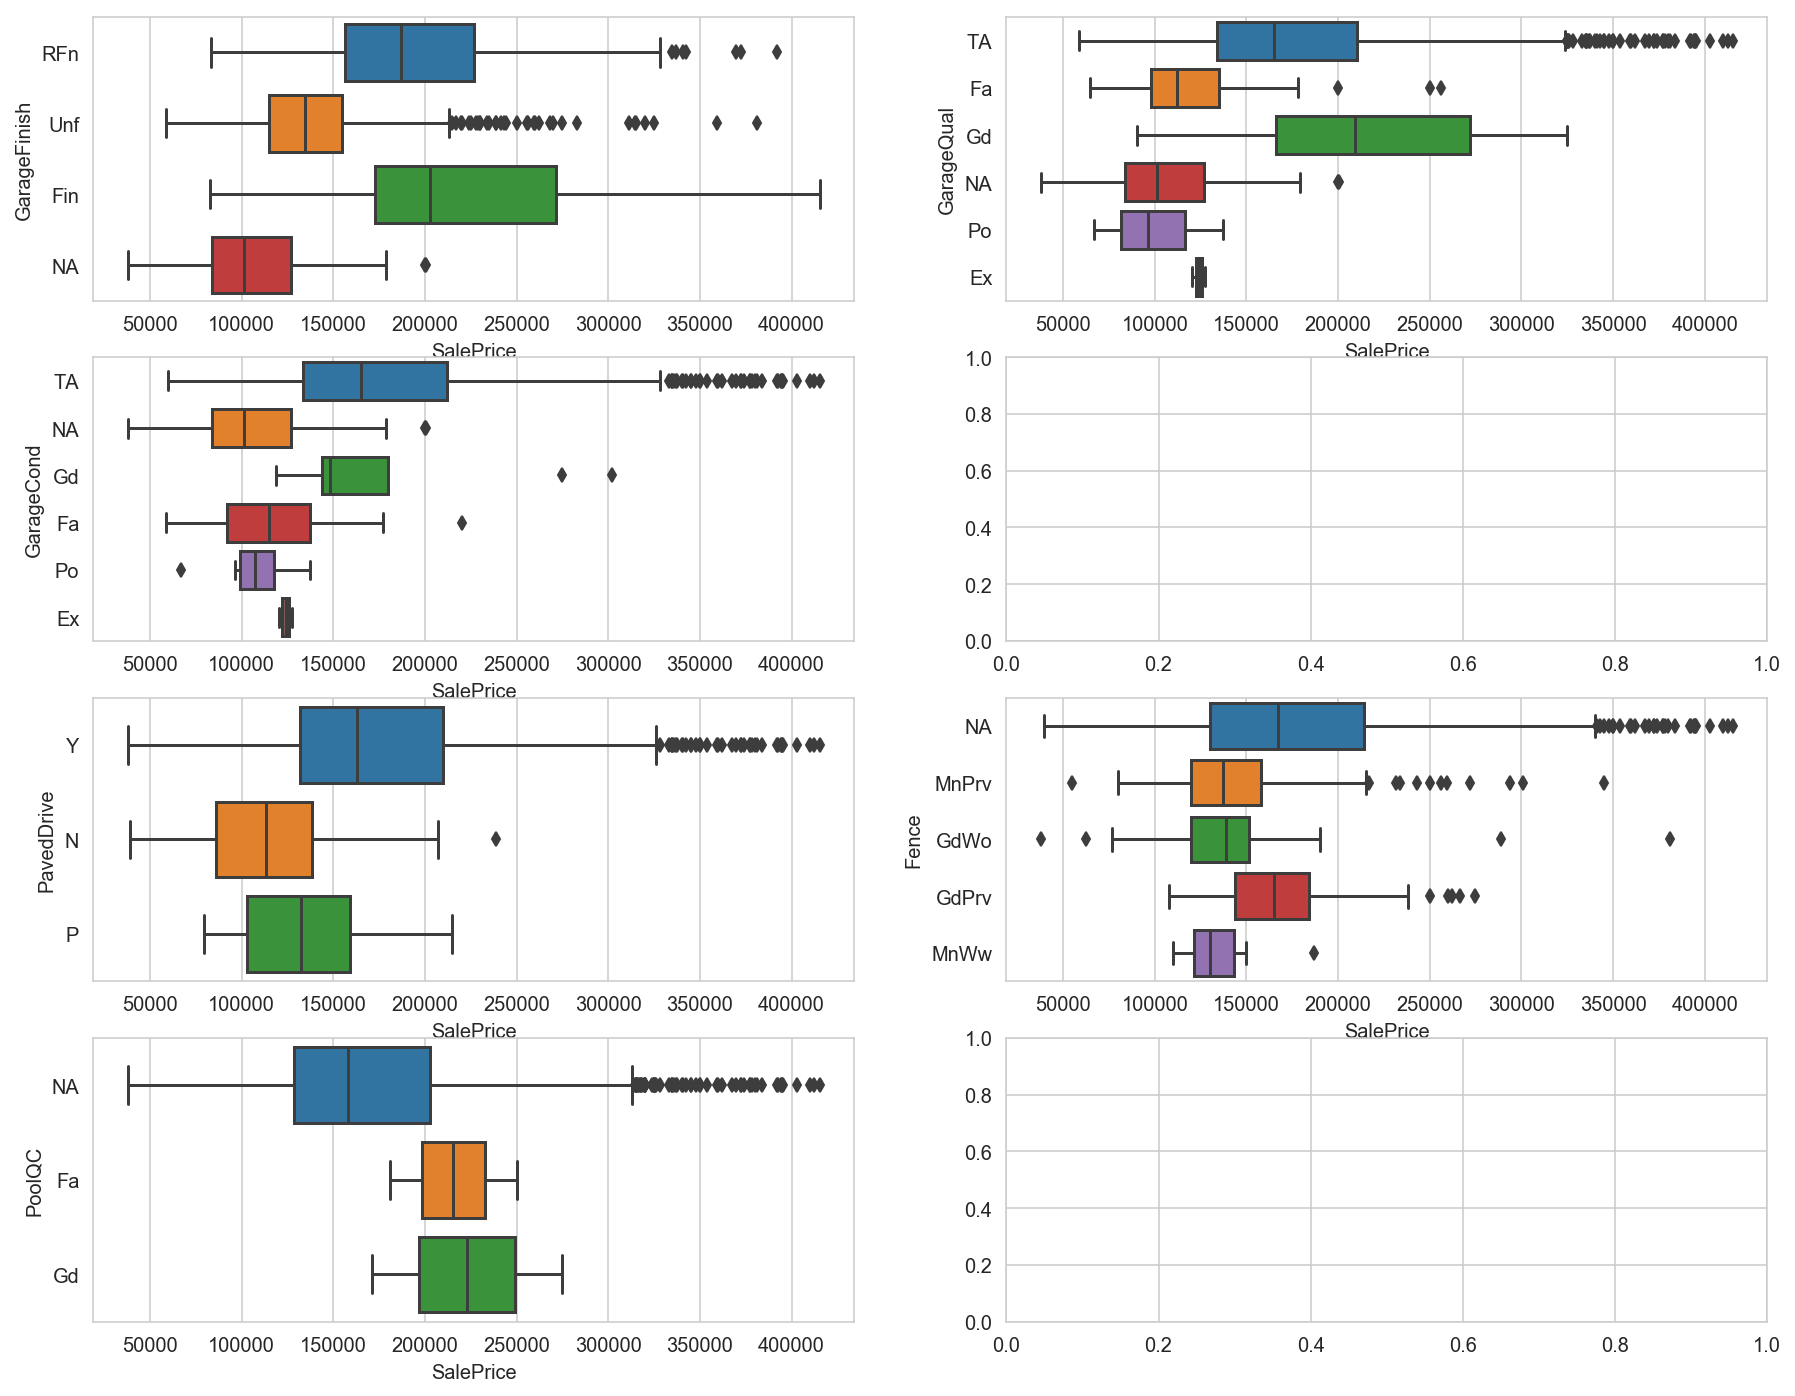

In [89]:
# Study Renovatable characteristics - 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'PoolQC'

fig, ((ax1,ax2),(ax3,ax4), (ax5,ax6), (ax7,ax8)) = plt.subplots(ncols=2,nrows=4,figsize=(15,12))

sns.boxplot(house_NA_resi['SalePrice'], house_NA_resi['GarageFinish'], ax=ax1)
sns.boxplot(house_NA_resi['SalePrice'], house_NA_resi['GarageQual'], ax=ax2)
sns.boxplot(house_NA_resi['SalePrice'], house_NA_resi['GarageCond'], ax=ax3)
sns.boxplot(house_NA_resi['SalePrice'], house_NA_resi['PavedDrive'], ax=ax5)
sns.boxplot(house_NA_resi['SalePrice'], house_NA_resi['Fence'], ax=ax6)
sns.boxplot(house_NA_resi['SalePrice'], house_NA_resi['PoolQC'], ax=ax7)

In [90]:
house_NA_resi['GarageQual'].value_counts()

TA    1187
NA      76
Fa      45
Gd      14
Po       3
Ex       2
Name: GarageQual, dtype: int64

<font color ='green'>

### Observation:

</font>

From the plot, most of the variables do not exhibit a large difference in SalePrice for the different categories. The variable that show a large difference in SalePrice is __GarageQual__.

<font color='purple'>

## Inferences based on EDA on Discrete Variables

</font>

Variables that seem to be the most important for predicting Sale Price:
    # GarageQual
    # FireplaceQu
    # BsmtQual
    # KitchenQual 
    # BsmtExposure 
    # BsmtFinType1
    # ExterQual 
    # Exterior1st 
    # MasVnrType

<font color = 'purple'>

## Set up Predictor and Target Variables

</font>

In [91]:
# Final variables
    # Included SalePrice and YrSold 
    # We need to filter based on YrSold and extract target variable from this dataframe later

predictors_reno = house_NA_resi[['YrSold','SalePrice','GarageQual','FireplaceQu','BsmtQual','KitchenQual','BsmtExposure',
                                  'BsmtFinType1','ExterQual','Exterior1st','MasVnrType','OverallQual',
                                  'YearRemodAdd','Fireplaces','OutdoorArea','BsmtFinSF1']]

In [92]:
# Get dummies for the discrete variables

predictors_reno = pd.get_dummies(predictors_reno, drop_first=True)

In [93]:
# Set up the predictor and target variables
# Split data into properties sold pre-2010 and properties sold in 2010

X = predictors_reno[predictors_reno['YrSold'] < 2010].iloc[:,2:]
X_holdout = predictors_reno[predictors_reno['YrSold'] >= 2010].iloc[:,2:]

y = predictors_reno[predictors_reno['YrSold'] < 2010]['SalePrice']
y_holdout = predictors_reno[predictors_reno['YrSold'] >= 2010]['SalePrice']

In [94]:
# Standardize the variables to ensure they are on the same scale

ss = StandardScaler()
X_std = ss.fit_transform(X)
X_holdout_std = ss.transform(X_holdout)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  """


<font color = 'purple'>

## Conduct Feature Selection + Fit Linear Regression Model 

</font>

In [95]:
# Use the RFE model for feature selection

from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

# Create a logistic regression estimator
lr = LinearRegression()

# Fit the RFE model 
rfecv = RFECV(estimator=lr, step=1, cv=10)
rfecv_columns = rfecv.fit(X_std,y)

In [96]:
# Check the RFE model score

rfecv.score(X_std,y)

0.8038766261738103

In [97]:
# Retreive the variables that have been selected using RFE

variable_list = []

for i, variable in enumerate(list(rfecv_columns.ranking_)):
    if variable == 1:
        variable_list.append(X.columns[i])

print(variable_list)

['OverallQual', 'YearRemodAdd', 'Fireplaces', 'OutdoorArea', 'BsmtFinSF1', 'GarageQual_Gd', 'GarageQual_NA', 'GarageQual_TA', 'FireplaceQu_Gd', 'FireplaceQu_NA', 'FireplaceQu_Po', 'FireplaceQu_TA', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_NA', 'BsmtQual_TA', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'BsmtExposure_Gd', 'BsmtExposure_Mn', 'BsmtExposure_NA', 'BsmtFinType1_BLQ', 'BsmtFinType1_LwQ', 'BsmtFinType1_NA', 'BsmtFinType1_Rec', 'BsmtFinType1_Unf', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing', 'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone']


In [98]:
# Set up the dataset that contains all the variables (including dummies) that have been selected 
    # fixed characteristics and renovatable characteristics
    
    # Step 1: Use the original dataset to get all dummies
predictors_final = pd.get_dummies(house_NA_resi, drop_first=True)

    # Step 2: Extract the relevant variables selected to create the final dataset
predictors_final = predictors_final[['YrSold','SalePrice','Total_SF', 'GrLivArea', 'TotRmsAbvGrd', 
                        'YearBuilt', 'Conditions_ArteryPosA', 'Conditions_FeedrRRAn', 'Conditions_RRNeNorm', 
                        'Neighborhood_BrkSide','Neighborhood_Crawfor', 'Neighborhood_NoRidge',
                        'Neighborhood_NridgHt', 'Neighborhood_Somerst','Neighborhood_StoneBr', 'Neighborhood_Timber',
                        'Neighborhood_Veenker', 'SaleCondition_Alloca', 'SaleCondition_Normal', 'SaleType_Con', 
                        'SaleType_New','SaleType_WD', 'GarageType_Attchd', 'GarageType_Basment','GarageType_BuiltIn', 
                        'GarageType_CarPort', 'GarageType_Detchd','GarageType_NA','OverallQual', 'YearRemodAdd', 
                        'Fireplaces', 'OutdoorArea', 'BsmtFinSF1',
                        'GarageQual_Gd', 'GarageQual_NA', 'GarageQual_TA', 'FireplaceQu_Gd', 'FireplaceQu_NA', 
                        'FireplaceQu_Po', 'FireplaceQu_TA', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_NA', 
                        'BsmtQual_TA', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'BsmtExposure_Gd', 
                        'BsmtExposure_Mn', 'BsmtExposure_NA', 'BsmtFinType1_BLQ', 'BsmtFinType1_LwQ', 
                        'BsmtFinType1_NA', 'BsmtFinType1_Rec', 'BsmtFinType1_Unf', 'ExterQual_Fa', 'ExterQual_Gd', 
                        'ExterQual_TA', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CemntBd', 
                        'Exterior1st_HdBoard', 'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone', 
                        'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing', 
                        'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone']]

In [99]:
# Set up the predictor and target variables

X_final = predictors_final[predictors_final['YrSold'] < 2010].iloc[:,2:]
X_final_holdout = predictors_final[predictors_final['YrSold'] >= 2010].iloc[:,2:]

y_final = predictors_final[predictors_final['YrSold'] < 2010]['SalePrice']
y_final_holdout = predictors_final[predictors_final['YrSold'] >= 2010]['SalePrice']

In [100]:
# Fit a linear regression model on the selected variables

lr_final = LinearRegression()
scores_reno = cross_val_score(lr_final, X_final, y_final, cv=10)

# Check the r2 score of the regression model 

print(scores_reno)
print(np.mean(scores_reno),np.std(scores_reno))

[0.88445251 0.89263105 0.91064033 0.9279491  0.88527625 0.87965953
 0.88090969 0.8522597  0.89057433 0.86526773]
0.8869620212723541 0.020148894539765316


<font color ='green'>
    
### Observation:

</font>

Based on the results, adding the renovatable variables has increased the accuracy of the model. The r2 score is fairly consistent when doing cross-validation. I will proceed to fit the model with the entire pre-2010 dataset and test on the 2010 data. 

In [101]:
# Fit the linear regression model on the pre-2010 dataset

lr_final.fit(X_final, y_final)

# Predict the SalePrice for 2010 data
y_final_pred = lr_final.predict(X_final_holdout)

In [102]:
# Check the r2 score and mean squared error for the new model

from sklearn.metrics import r2_score

print(r2_score(y_final_holdout,y_final_pred))
print(mean_squared_error(y_final_holdout,y_final_pred))

0.9054158101039947
443922596.231612


<font color ='green'>
    
### Observation:

</font>

Based on the results, the r2 score and mean squared error improved compared to the first model for predicting SalePrice.

In [103]:
# Retrieve the constant for the model

lr_final.intercept_

-956208.9592751509

In [104]:
# Retrieve coefficient value for each variable

for i,name in enumerate(X_final.columns):
    print(X_final.columns[i], lr_final.coef_[i])

Total_SF 21.38159762506531
GrLivArea 22.963802603208478
TotRmsAbvGrd -107.49682918243707
YearBuilt 262.4339636651987
Conditions_ArteryPosA 31970.16354099768
Conditions_FeedrRRAn -25483.00897980343
Conditions_RRNeNorm 5699.558908250159
Neighborhood_BrkSide 12374.858244611012
Neighborhood_Crawfor 33938.75641432198
Neighborhood_NoRidge 36674.40956435273
Neighborhood_NridgHt 21129.218625240224
Neighborhood_Somerst 13652.05486869274
Neighborhood_StoneBr 30651.08014996741
Neighborhood_Timber 8232.650122141129
Neighborhood_Veenker 14281.53150520142
SaleCondition_Alloca 17455.022851986927
SaleCondition_Normal 8962.698142970636
SaleType_Con 36440.808680329574
SaleType_New 29160.61365996622
SaleType_WD 4509.313416847292
GarageType_Attchd 33029.28195856042
GarageType_Basment 26682.232861808363
GarageType_BuiltIn 39592.53792650873
GarageType_CarPort 18468.20256493494
GarageType_Detchd 30991.725284099473
GarageType_NA 17944.858171133135
OverallQual 8974.705502958424
YearRemodAdd 219.35731985524762


<font color = 'purple'>
    
## Evaluation of model results

</font>

The intercept of the model is -956208. This means that when all the continuous variables and the dummy variables in the model are equal to zero, the SalePrice is at -$956,208. The coefficients of the variables indicate the dollar amount that the SalePrice will change, with each unit change of the continuous variable or if the category represented by the dummy variable is present.  

To calculate the value of each house, we will take    __Intercept + Coefficients * Variables__
   

### Illustration of how to read the coefficients:


__For continuous variables__: The coefficient of OutdoorArea is 29.13. This means that the SalePrice will increase by $29.13 for each additional square feet of Outdoor Area. 

__For discrete variables__: The coefficient of ExterQual_Gd is -20345.58. The category that was dropped from the variable 'ExterQual' when creating the model, was ExterQual_Excellent. This means that the SalePrice of a house with ExterQual_Gd will be lower by $20,345.58 compared with a house with ExterQual_Excellent _(when all other variables are constant)_.

### How to use the model:

We can use the second model in 2 ways:

#### __1st way__
Use the model to gauge if the asking price for the house is reasonable. That is, based on the fixed and renovatable characteristics of the house on sale, determine the price that the company can pay for the house using the model. If the asking price is above the SalePrice predicted by the model, we should not purchase the house. 

#### __2nd way__
After studying the house and getting an idea of what could be renovated, compare the cost of renovation / improvement of that feature to its coefficient in the model. If it costs less than the increase in SalePrice predicted by the model, we should go ahead to renovate that feature. 

The total increase in price will allow us to determine the amount that we can profit from the purchase and renovation of the house. 

### Limitations of the model:

There are some limitations in the model e.g. some coefficients which may not make logical sense. 

E.g. for FireplaceQu, logically the better the quality of the fireplace, it should result in a higher SalePrice. However,the coefficients obtained from the current model suggest that the SalePrice for a Fireplace with quality labelled 'Good', compared to a Fireplace with quality labelled 'Excellent' will cause the SalePrice to increase by $4,124. 

Due to such limitations of the model, my next step would be to continue refining the model and conduct more elaborate research online and running more models to obtain a better r2 score and reduce the mean squared error and variance of the results. With an improved model, I will re-look at the coefficients of the different variables to verify if they make more sense. 

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. What property characteristics predict an "abnormal" sale?

---

The `SaleCondition` feature indicates the circumstances of the house sale. From the data file, we can see that the possibilities are:

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
One of the executives at your company has an "in" with higher-ups at the major regional bank. His friends at the bank have made him a proposal: if he can reliably indicate what features, if any, predict "abnormal" sales (foreclosures, short sales, etc.), then in return the bank will give him first dibs on the pre-auction purchase of those properties (at a dirt-cheap price).

He has tasked you with determining (and adequately validating) which features of a property predict this type of sale. 

---

**Your task:**
1. Determine which features predict the `Abnorml` category in the `SaleCondition` feature.
- Justify your results.

This is a challenging task that tests your ability to perform classification analysis in the face of severe class imbalance. You may find that simply running a classifier on the full dataset to predict the category ends up useless: when there is bad class imbalance classifiers often tend to simply guess the majority class.

It is up to you to determine how you will tackle this problem. I recommend doing some research to find out how others have dealt with the problem in the past. Make sure to justify your solution. Don't worry about it being "the best" solution, but be rigorous.

Be sure to indicate which features are predictive (if any) and whether they are positive or negative predictors of abnormal sales.

<font color ='purple'>

## First, study the distribution of the SaleCondition variable

</font>

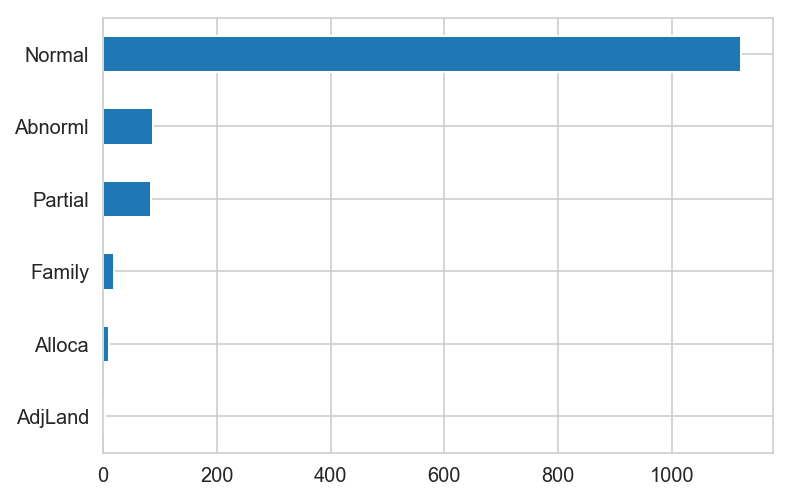

In [105]:
# Check the distribution of different categories of SaleCondition

house_NA_resi['SaleCondition'].value_counts().sort_values(ascending=True).plot(kind='barh')

In [106]:
# Check the proportion of each SaleCondition category
SaleCondition_df = pd.DataFrame(house_NA_resi['SaleCondition'].value_counts())
SaleCondition_df['%'] = SaleCondition_df['SaleCondition'] / np.sum(SaleCondition_df['SaleCondition']) * 100

# Print out the SaleCondition Dataframe
SaleCondition_df

SaleCondition          %
Normal            1121  84.476262
Abnorml             88   6.631500
Partial             85   6.405426
Family              19   1.431801
Alloca              10   0.753580
AdjLand              4   0.301432

In [107]:
# Create a new column for Abnormal Sale condition as a binary

abnormal = []

for condition in house_NA_resi['SaleCondition'].values:
    if condition == 'Abnorml':
        abnormal.append(1)
    else:
        abnormal.append(0)
        
house_NA_resi['Abnormal'] = abnormal

<font color ='purple'>

## Conduct resampling to reduce class imbalance

</font>

In [108]:
# Class count
count_not_abnormal, count_abnormal = house_NA_resi['Abnormal'].value_counts()

# Divide by class 
df_not_abnormal = house_NA_resi[house_NA_resi['Abnormal'] == 0]
df_abnormal = house_NA_resi[house_NA_resi['Abnormal'] == 1]

In [109]:
# Under sampling for majority class - 'not abnormal'
df_not_abnormal_under = df_not_abnormal.sample(250)

# Over sampling for the minority class - 'abnormal'
df_abnormal_over = df_abnormal.sample(250, replace=True)

# Finalize dataframe for the resampled dataset
df_resampled = pd.concat([df_not_abnormal_under, df_abnormal_over], axis=0)

In [110]:
# Check resampled proportion of abnormal and not abnormal
df_resampled['Abnormal'].value_counts()

1    250
0    250
Name: Abnormal, dtype: int64

<font color ='purple'>

## Identifying predictor variables for SaleCondition

</font>

Based on online research and logical asuumption, I have shortlisted the following variables as predictors for SaleCondition:
    # SaleType
    # YrSold
    # YearRemodAdd
    # Neighborhood

In [111]:
# Set up the predictor and target variables

X = pd.get_dummies(df_resampled[['SaleType','YrSold','YearRemodAdd','Neighborhood']], drop_first=True)
y = df_resampled['Abnormal']

In [112]:
# Split the dataset into train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(400, 30) (400,)
(100, 30) (100,)


In [113]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=1)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [114]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

0.8780487804878049
0.85


In [115]:
rfc.feature_importances_

array([1.87260586e-01, 4.47170195e-01, 8.56233812e-03, 1.35555986e-03,
       2.90918029e-02, 5.37039095e-04, 8.18870585e-02, 4.15644860e-03,
       1.67737248e-02, 1.06763104e-02, 1.12806290e-02, 9.55028364e-03,
       2.39323436e-02, 8.22989377e-03, 1.18301549e-02, 3.18921454e-03,
       1.93551555e-02, 1.59243034e-02, 5.81591467e-06, 1.34982196e-02,
       8.42965615e-03, 8.35528652e-03, 2.01162659e-02, 1.54095426e-02,
       1.06906809e-02, 1.50158904e-02, 4.48196740e-03, 1.64357385e-03,
       8.92146235e-03, 2.66859680e-03])

In [116]:
X.columns

Index(['YrSold', 'YearRemodAdd', 'SaleType_ConLD', 'SaleType_ConLI',
       'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Neighborhood_Veenker'],
      dtype='object')

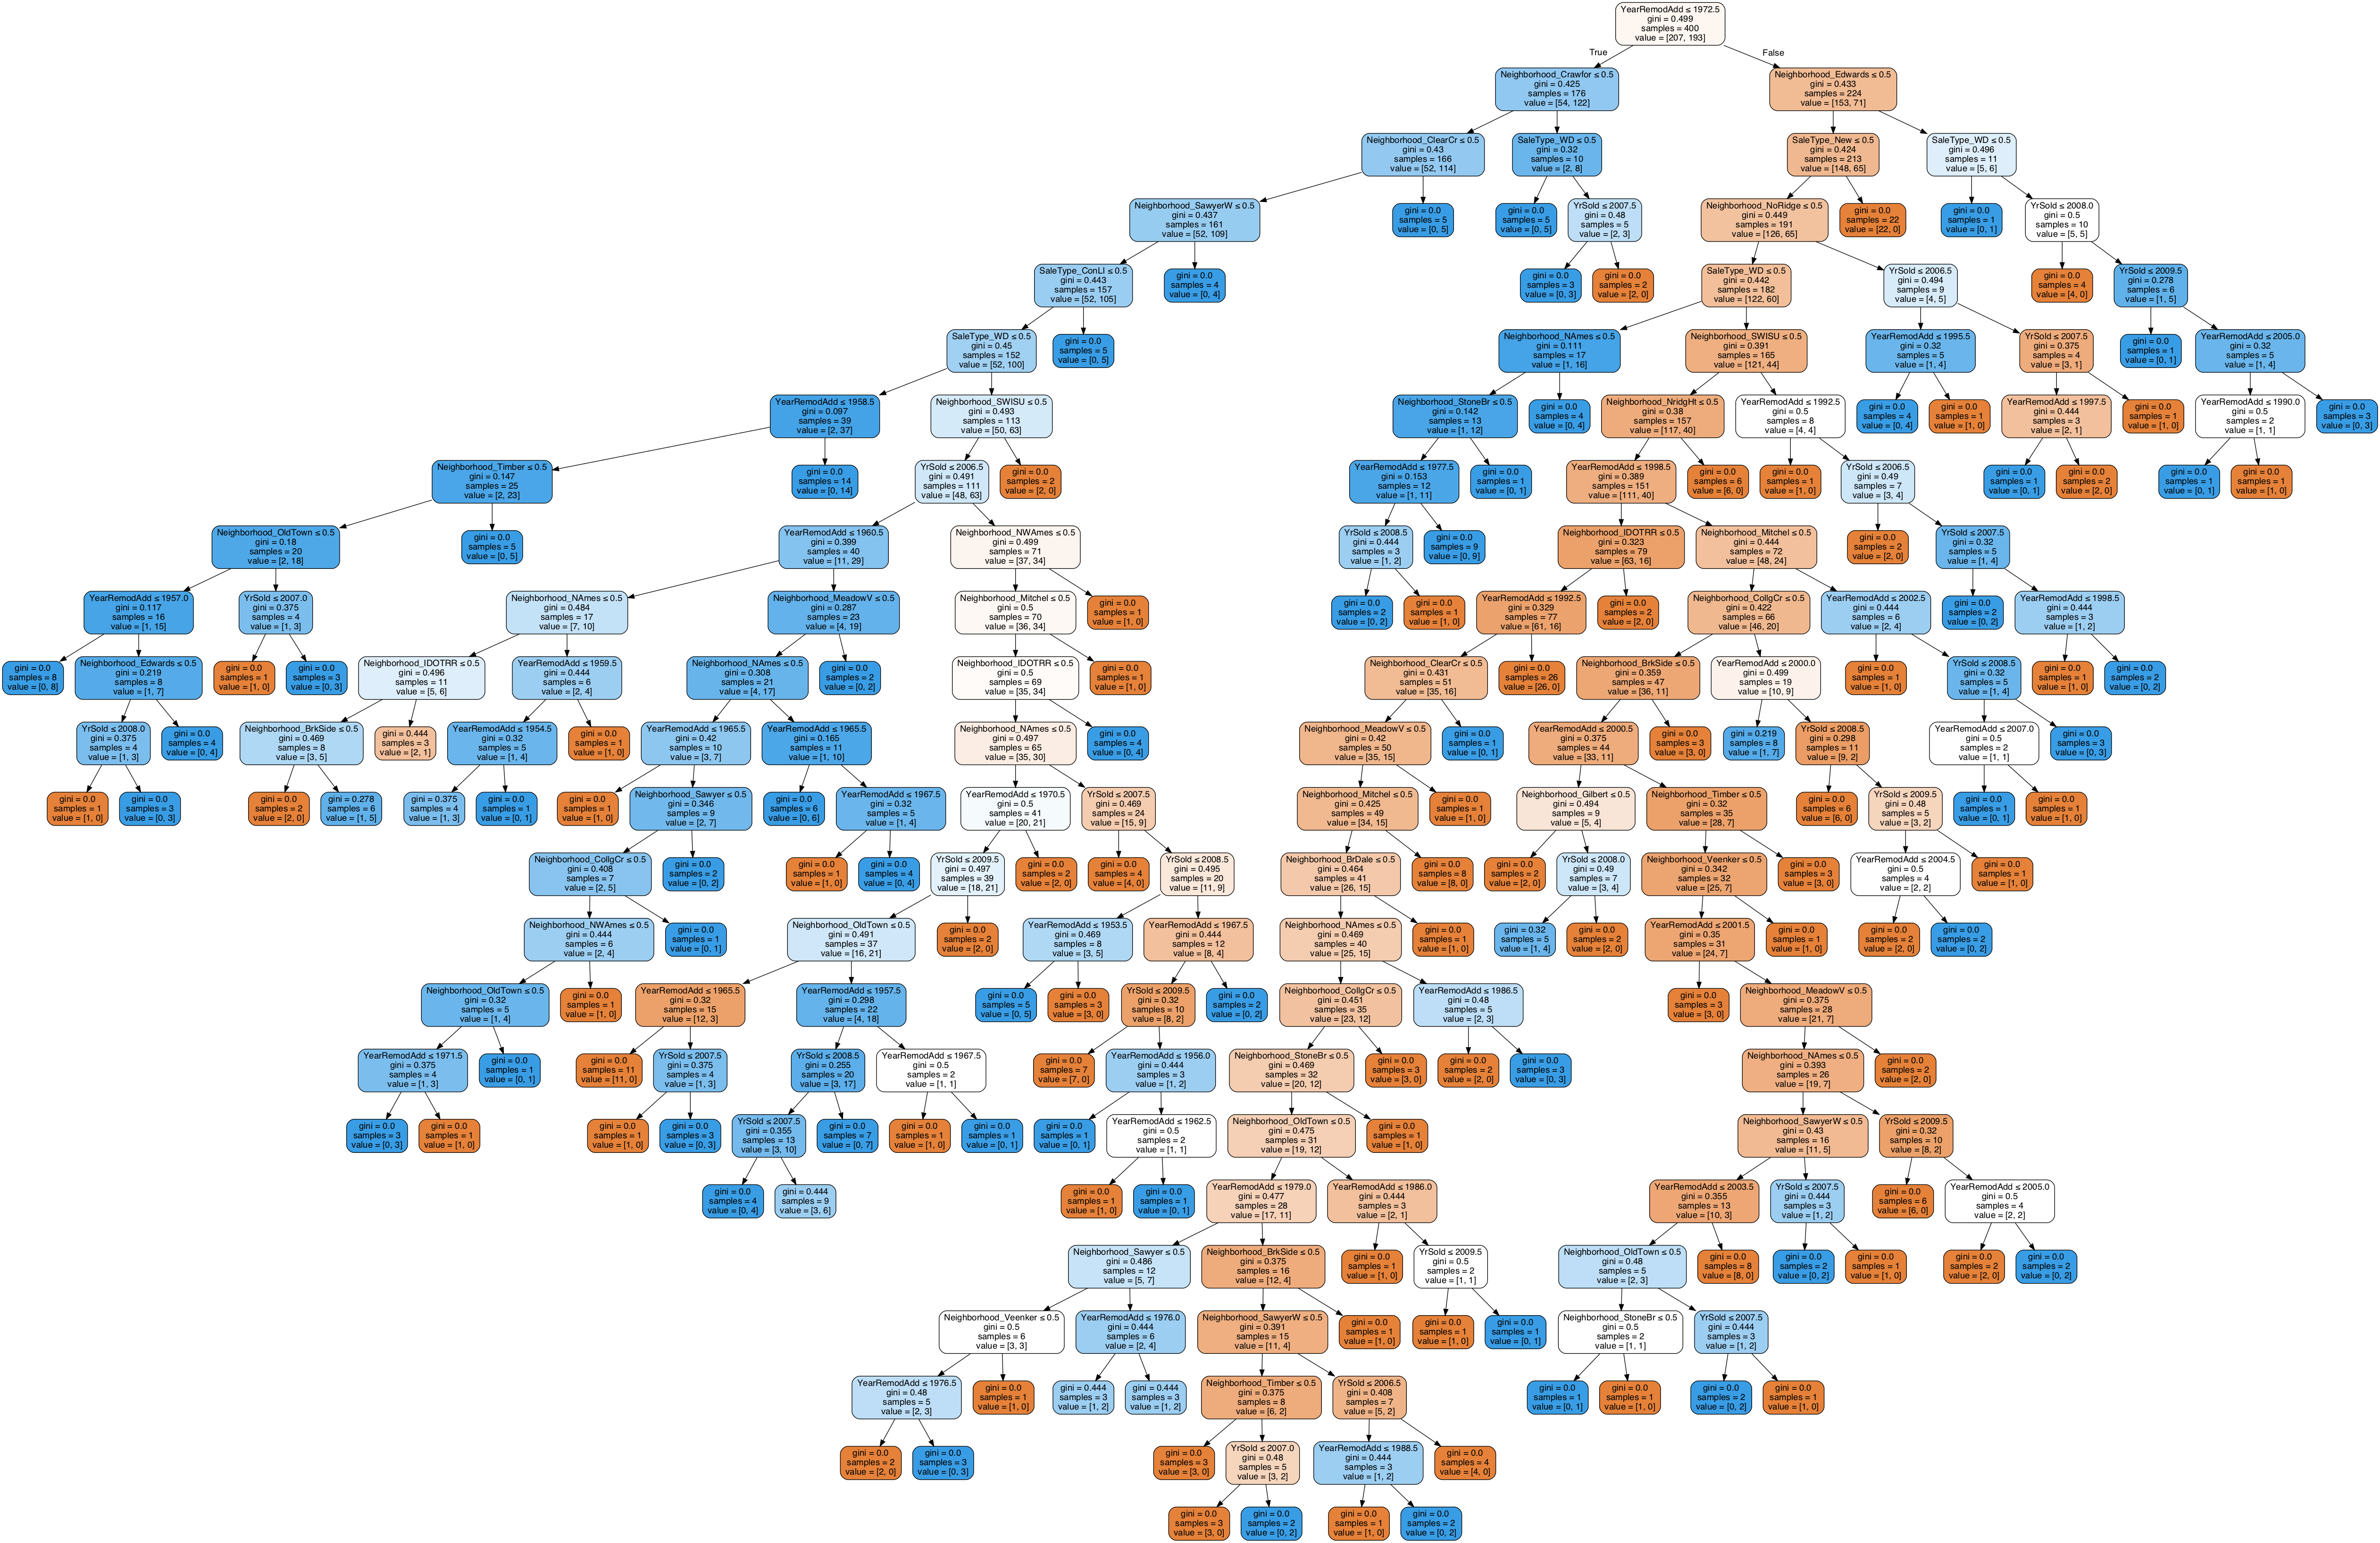

In [117]:
# TEMPLATE CODE to visualize the decision tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.tree import DecisionTreeClassifier

dtc_rfc1 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=1791095845, splitter='best')
dtc_rfc1.fit(X_train,y_train)

# # initialize the output file object
dot_data = StringIO() 

# my fit DecisionTreeRegressor object here is: dtr1
# for feature_names i put the columns of my Xr matrix
export_graphviz(dtc_rfc1, out_file=dot_data,  
             filled=True, rounded=True,
              special_characters=True,
              feature_names=X_train.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [118]:
rfc.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=1791095845, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=2135392491, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_we

In [119]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [120]:
accuracy_score(y_test,y_pred)

0.69

In [121]:
log_table = pd.DataFrame([X.columns,np.exp(logreg.coef_[0])]).transpose()
log_table.columns = ['Variable','Odds Ratio of Abnormal Sale']
log_table

    # If Odds Ratio <1, the presence of these variables are less likely to be an indicator of Abnormal Sale
    # If Odds Ratio >1, the presence of these variables are more likely to be an indiacator of Abnormal Sale

Variable Odds Ratio of Abnormal Sale
0                 YrSold                     1.02734
1           YearRemodAdd                    0.973794
2         SaleType_ConLD                       1.847
3         SaleType_ConLI                      1.4011
4           SaleType_New                   0.0720483
5           SaleType_Oth                     1.43364
6            SaleType_WD                    0.134687
7    Neighborhood_BrDale                     1.40328
8   Neighborhood_BrkSide                    0.406953
9   Neighborhood_ClearCr                     3.57781
10  Neighborhood_CollgCr                     1.02711
11  Neighborhood_Crawfor                     1.16384
12  Neighborhood_Edwards                     1.14542
13  Neighborhood_Gilbert                    0.917134
14   Neighborhood_IDOTRR                    0.930449
15  Neighborhood_MeadowV                       1.064
16  Neighborhood_Mitchel                    0.545844
17    Neighborhood_NAmes                     1.17863
18  Neighborhood_NPkVill                       1.137
19   Neighborhood_NWAmes                    0.958755
20  Neighborhood_NoRidge                     2.15422
21  Neighborhood_NridgHt                    0.390835
22  Neighborhood_OldTown                     1.36214
23    Neighborhood_SWISU                     1.18287
24   Neighborhood_Sawyer                       1.353
25  Neighborhood_SawyerW                     1.81445
26  Neighborhood_Somerst                    0.715674
27  Neighborhood_StoneBr                    0.648994
28   Neighborhood_Timber                     0.97415
29  Neighborhood_Veenker                     0.58586